# ER131 Final Project Template
Fall 2025

# Clearing the Queue: Predicting Interconnection Queue Acceptance and Costs
 
1. Molly Ho: cleaned and organized the datasets, created the EDA visualizations, created the prediction models, hyperparameter tuning and cross-validation, debugging. Evaluated and compared the models in notebook via code. final notebook (data cleaning, EDA, modeling) 25 hrs
2. Angela Shao: discussed possible prediction problems, found datasets, final notebook (abstract, project background, project objective, resource allocation and conclusions); 21 hrs
3. Erin Yang: researched background information and found datasets, did EDA, set up Github / file management. final notebook (data descriptions, data cleaning, final style edits) 21 hrs

## Abstract (5 points)
Although this section comes first, you'll write it last.  It should be a ~250 word summary of your project.  1/3rd of the abstract should provide background, 1/3rd should explain what you did, and 1/3rd should explain what you learned.

The focus of our project is the interconnection queue, specificially what factors can contribute to a more efficient queue and consequently, how resources should be allocated. The current interconnection queue is overloaded; to help, we created two prediction models that will predict the likelihood a project would be accepted within 5 years and what their POI cost per kilowatt would be. This will help reduce the number of projects that are entering the grid only to later withdraw, allowing for a more efficient queue that maximizes its resources towards projects that will likely be accepted and become operational. 
From our prediction models, we learned that projects that are typically accepted within 5 years are solar projects with a capacity of around 64.15 MW. Additionally, the average POI cost is $94.302960/KW, though individual project costs will vary based on a variety of features such as nameplace capacity in MW and coordinates of the POI. This information will be useful to those seeking to connect to the interconnection queue as they will be able have a greater sense of what type of projects currently have a higher likelihood of being accepted within 5 years and with our prediction model, have an estimate of the POI cost they will have to pay. (209 words)

## Project Background (5 points)
The Interconnection Queue is a waitlist of proposed electricity generation projects, ranging from solar to gas to coal, that are seeking to connect to the electric grid. This system was set in place to ensure a proposed project meets all the requirements of a series of reviews before they can become operational. However, the queue is greatly backlogged, likely due to a recent surge in renewable energy project applications and the fact that the interconnection process was not designed to manage a queue of such high volume. Thus, many projects wait years before they can even enter the review process, let alone become operational. The queue has become a bottleneck, reducing the possible addition of much new generation capacity to the grid. In recent years, there have been reforms put in place to help streamline the interconnection queue process and allow it to manage a high volume of project applications, such as those from the Federal Energy Regulatory Commission (FERC) Order 2023. One such reform addresses interconnection queue backlog through a "first-ready, first-served" cluster study process, which allows interconnection requests that are equally queued and of equal study priority to be studied in groups. Increased financial commitments and readiness requirements to enter and proceed in the queue were put in place as well. Only time will tell whether or not these reforms prove successful in reducing the backlog and making the process more efficient. In the meantime, quantitative analyses could be helpful to support projects either currently in the queue or those that are considering entering it. This includes creating models that predict the likelihood a project will get accepted within 5 years and what their POI cost per kilowatt would be. These types of quantitative analyses will help projects determine whether they should stay or withdraw, or even join the queue in the first place, based on information they receive regarding their potential wait time and POI cost if accepted. As these are the common reasons why a project ends up withdrawing from the queue, being able to provide this knowledge early on in the process will save much time and resources. As a result, the system will also become more efficient as projects that will end up withdrawing later on in the queue process will not be there to contribute to the long wait times or trigger the consequences of withdrawal, such as a need for restudies and reevaluation of cost allocations in cluster studies. 

## Project Objective (5 points)
The purpose of this project is to train and evaluate different models to predict the likelihood a project on the interconnection queue will be accepted within 5 years, using a variety of features drawn from LBNL and CEC datasets, including capacity in MW and resource type. 
Another objective of this project is to train and evaluate different models to predict the POI cost per kilowatt for a project on the interconnection queue, using a variety of features drawn from a LBNL dataset, including nameplate capacity in MW, longitude of POI, and latitude of POI. 
It is important to answer these questions in an effort to streamline the interconnection queue process. Many projects withdraw due to long queue times and high costs, and our prediction models will be able to provide projects an estimate of whether or not they will be accepted with 5 years as well as what their POI cost per kilowatt will be. This allows projects to make a decision early on regarding whether or not they want to join, or stay in, the queue. A direct consequence of this will be a more efficient interconnection queue, and resources will be allocated to projects that have already determined they are willing to wait in the queue and pay the cost required to connect to the electric grid. 

## Input Data Description (5 points)
Here you will provide an initial description of your data sets, including:
1. The origins of your data.  Where did you get the data?  How were the data collected from the original sources?  You must provide enough information for the reader to be able to access the data themselves.  
2. The structure, granularity, scope, temporality and faithfulness (SGSTF) of your data.  To discuss these attributes you should load the data into one or more data frames (so you'll start building code cells for the first time).  At a minimum, use some basic methods (`.head`, `.loc`, and so on) to provide support for the descriptions you provide for SGSTF. 
3. You should also describe which data fields you will use as your target variables, and which you will use as features.  

### Importing Packages

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import pdfplumber
import re
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import warnings
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge
from scipy import stats
from sklearn.discriminant_analysis import StandardScaler
from sklearn.ensemble import ExtraTreesRegressor


warnings.filterwarnings('ignore')


## Interconnection Queue Data
### Data Origins
https://emp.lbl.gov/queues 

This dataset was acquired from the Lawrence Berkeley National Lab’s report, ‘Queued Up’. They generously provide their cleaned datasets for public access. In order to create this dataset, LBNL partners with interconnection.fyi to aggregate data collected from all U.S. Independent System Operators (ISO) in addition to other non-ISO utilities.
### SGSTF

In [10]:
queue_data = pd.read_csv('queue_data.csv', header=1)
queue_data.head()

,q_id,q_status,q_date,prop_date,on_date,wd_date,ia_date,IA_status_raw,IA_status_clean,county,...,project_type,type1,type2,type3,mw1,mw2,mw3,type_clean,q_year,prop_year
0,not assigned,withdrawn,43511.0,NaN,NaN,NaN,NaN,Withdrawn,Withdrawn,Coconino,...,Generation,Solar,NaN,NaN,20.0,NaN,NaN,Solar,2019.0,NaN
1,Q007 - 061,operational,38497.0,39539.0,NaN,NaN,NaN,In-Service,Operational,Navajo,...,Generation,Other,NaN,NaN,24.0,NaN,NaN,Other,2005.0,2008.0
2,Q044a.,withdrawn,39597.0,40909.0,NaN,NaN,NaN,Withdrawn,Withdrawn,Yuma,...,Generation,Solar,NaN,NaN,900.0,NaN,NaN,Solar,2008.0,2012.0
3,Q044b.,withdrawn,39597.0,41760.0,NaN,NaN,NaN,Withdrawn,Withdrawn,Maricopa,...,Generation,Solar,NaN,NaN,300.0,NaN,NaN,Solar,2008.0,2014.0
4,Q1,withdrawn,38041.0,42217.0,NaN,NaN,NaN,Withdrawn,Withdrawn,San Juan,...,Generation,Coal,NaN,NaN,700.0,NaN,NaN,Coal,2004.0,2015.0


In [11]:
queue_data['q_year'].unique()

array([2019., 2005., 2008., 2004., 2006., 2010., 2011., 2012., 2017.,
       2013., 2014., 2015., 2016., 2018., 2007., 2020., 2021., 2022.,
       2023., 2024., 2009.,   nan, 2003., 1970., 2001., 2000., 2002.,
       1999., 1997., 1998., 1995.])

We can see that the data comes in a clean CSV format. Each row represents one project that is or was on the interconnection queue. The columns represent features of each project, such as generation type, location (county), queue status, and date the project joined the queue. This data covers about 97% of all electricity generation in the U.S. from 1995 to 2024. It is updated at least yearly, although the exact rate is unknown. The rate of measurement is the rate at which new projects join the queue, which is not standardized. This data is from a reputable source and faithful. No signs of unrealistic data or falsification were found.


## Utility Renewable Capacity by Type and County: 2024
### Data Origins
https://cecgis-caenergy.opendata.arcgis.com/documents/CAEnergy::utility-scale-renewable-capacity-totals-by-county-2024/about 

This data comes from the CA Energy Commission (CEC). The CEC used electricity capacity data from utility-scale powerplants and aggregated this data by county. 

### SGSTF

In [12]:
import pandas as pd

# Using the data directly because the spacings were inconsistent and no software read it properly :(
data = {
    'County': ['Alameda', 'Amador', 'Butte', 'Calaveras', 'Colusa', 'Contra Costa', 'El Dorado', 'Fresno', 'Glenn', 'Humboldt', 'Imperial', 'Inyo', 'Kern', 'Kings', 'Lake', 'Lassen', 'Los Angeles', 'Madera', 'Marin', 'Mariposa', 'Mendocino', 'Merced', 'Mono', 'Monterey', 'Napa', 'Nevada', 'Orange', 'Placer', 'Plumas', 'Riverside', 'Sacramento', 'San Benito', 'San Bernardino', 'San Diego', 'San Francisco', 'San Joaquin', 'San Luis Obispo', 'San Mateo', 'Santa Barbara', 'Santa Clara', 'Santa Cruz', 'Shasta', 'Sierra', 'Siskiyou', 'Solano', 'Sonoma', 'Stanislaus', 'Sutter', 'Tehama', 'Trinity', 'Tulare', 'Tuolumne', 'Ventura', 'Yolo', 'Yuba'],
    'Biomass': [22, 0, 2, 0, 32, 7, 0, 56, 0, 61, 0, 0, 124, 3, 0, 36, 219, 40, 4, 0, 0, 13, 0, 9, 0, 0, 80, 52, 35, 56, 15, 0, 3, 25, 2, 59, 2, 11, 3, 3, 5, 144, 0, 13, 10, 12, 24, 0, 0, 0, 16, 37, 2, 31, 3],
    'Geothermal': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 723, 302, 0, 0, 367, 0, 0, 0, 0, 0, 0, 0, 85, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1238, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'Small Hydro': [0, 14, 68, 32, 0, 0, 70, 37, 5, 1, 93, 157, 64, 0, 6, 30, 214, 68, 0, 9, 13, 31, 21, 0, 0, 82, 12, 92, 28, 50, 14, 0, 38, 12, 0, 11, 4, 0, 0, 0, 0, 87, 14, 45, 0, 3, 21, 0, 21, 14, 38, 195, 3, 12, 2],
    'Solar PV': [18, 2, 11, 2, 0, 48, 0, 1571, 2, 2, 2225, 2, 5484, 1726, 3, 3, 1531, 84, 3, 0, 7, 353, 0, 140, 2, 0, 27, 6, 0, 4514, 316, 146, 1670, 206, 14, 34, 962, 0, 67, 31, 3, 8, 0, 0, 36, 15, 301, 3, 17, 0, 708, 5, 4, 17, 1],
    'Solar Thermal': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 250, 0, 0, 734, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'Wind': [286, 0, 0, 0, 0, 38, 0, 0, 0, 0, 265, 0, 3569, 0, 0, 0, 2, 0, 0, 0, 0, 18, 0, 15, 0, 0, 0, 0, 0, 676, 0, 0, 7, 182, 0, 4, 0, 0, 95, 0, 0, 101, 0, 0, 1099, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0],
    'Total': [325, 16, 81, 33, 32, 92, 70, 1663, 7, 65, 3306, 461, 9241, 1729, 376, 68, 1966, 192, 7, 9, 20, 415, 106, 164, 2, 82, 119, 149, 63, 5545, 344, 146, 2451, 425, 17, 107, 968, 11, 165, 35, 8, 340, 14, 59, 1144, 1268, 346, 3, 40, 14, 762, 236, 9, 61, 6]
}

county_cap = pd.DataFrame(data)
county_cap.head()

,County,Biomass,Geothermal,Small Hydro,Solar PV,Solar Thermal,Wind,Total
0,Alameda,22,0,0,18,0,286,325
1,Amador,0,0,14,2,0,0,16
2,Butte,2,0,68,11,0,0,81
3,Calaveras,0,0,32,2,0,0,33
4,Colusa,32,0,0,0,0,0,32


The data was provided in a PDF format so a package to convert the PDF to a CSV is useful here. Unfortunately, the format of the data on the pdf was not consistent, the values failed to be aligned properly. Since the dataset was small enough, it was simpler to just manually put the values into a new dataframe instead of using software to convert its format. Each row represents a county and each column represents the summed energy capacity in MW for a generation type. In order to aggregate energy capacity, CEC added energy capacity for all utility-scale power plants in a given CA county in 2024. Since this data only covers capacity in California, we do not expect the resulting model to be applicable to other states. This data only covers capacity in 2024 and is not updated. However, a new dataset for CA renewable capacity is created every year by the CEC. 

## Utility Renewable Generation by Type and County: 2022
### Data Origins
https://data.ca.gov/dataset/utility-renewable-generation-by-type-and-county-2022 
The origins of this data are the same as the CAEC Capacity dataset. (see above)

### SGSTF

In [13]:
# open pdf
with pdfplumber.open("UtilRenGenTotCnty2024.pdf") as pdf:
    page = pdf.pages[1]
    lines = page.extract_text().split("\n")

rows = []
for line in lines:
    # skip empty or non-data lines
    if not line.strip():
        continue

    # split into parts
    parts = line.split()

    # find where numbers or dashes start (first numeric token or '-')
    for i, token in enumerate(parts):
        if re.match(r"^[-\d,]+$", token):  # a number or dash
            split_index = i
            break
    else:
        continue  # skip if no numeric data found

    # everything before that is the county name
    county = " ".join(parts[:split_index])
    numbers = parts[split_index:]

    # combine back into a single row
    rows.append([county] + numbers)

# Convert to DataFrame
df = pd.DataFrame(rows)

# Replacing dashes/commas
df = df.replace("-", '0').replace(",", "", regex=True)

# list of column names
new_columns = [
    "County",
    "Biomass",
    "Geothermal",
    "Small Hydro",
    "Solar Photovoltaic",
    "Solar Thermal",
    "Wind",
    "Total"
]

# Applying new column names
df_new = pd.DataFrame(columns=new_columns)

df_new['County'] = df[0]
df_new['Biomass'] = df[1]
df_new['Geothermal'] = df[2]
df_new['Small Hydro'] = df[3]
df_new['Solar Photovoltaic'] = df[4]
df_new['Solar Thermal'] = df[5]
df_new['Wind'] = df[6]
df_new['Total'] = df[7]

# drop 1st row
df_new = df_new.drop(0)

#rename df
county_gen = df_new.copy()
county_gen.head()

,County,Biomass,Geothermal,Small Hydro,Solar Photovoltaic,Solar Thermal,Wind,Total
1,Alameda,114841,0,0,28649,0,806969,950459
2,Alpine,0,0,0,0,0,0,0
3,Amador,0,0,81851,1971,0,0,83822
4,Butte,16031,0,214115,14653,0,0,244799
5,Calaveras,0,0,217624,2838,0,0,220462


The data was provided in a PDF format so a package to convert the PDF to a CSV is useful here. Each row represents a county and each column represents the summed energy generation in GWh for a generation type. In order to aggregate energy generation, CEC added energy generation for all utility-scale power plants in a given CA county in 2024. Since this data only covers generation in California, we do not expect the resulting model to be applicable to other states. This data only covers generation in 2024 and is not updated. However, a new dataset for CA renewable generation is created every year by the CEC. 

## Interconnection Cost Data
### Data Origins
https://emp.lbl.gov/research-areas/generator-interconnection-costs \
LBNL provides pre-cleaned datasets for interconnection costs for some ISOs, RTOs, and non-ISO Balancing Authorities. Unfortunately, cost data is not publicly available for all operators so this data is less comprehensive than the queue dataset. We decided to use the dataset for non-ISO Balancing Authorities because it included more features and covered a larger spatial range than the other datsets. The data was compiled by LBNL from 2,104 interconnection studies.

### SGSTF

In [14]:
cost = pd.read_csv('interconnection_costs.csv')
cost.head()

,Project #,Project # in Queued Up,Queue Date,Balancing Authority,BA,State,County,Upgrade of Existing Generator,Latitude of POI,Longitude of POI,...,Study Year,Restudy,Revision of Study,Fuel,Nameplate MW,Request Status,Service Type,$2024 POI Cost/kW,$2024 Network Cost/kW,$2024 Total Cost/kW
0,G0327,G0327,5/9/08,Bonneville Power Administration,BPA,WA,NaN,N,46.29910,-120.21815,...,2009,N,N,Biomass,7.0,Operational,NaN,25.24,19.91,45.16
1,"G0367, G0368",NaN,NaN,Bonneville Power Administration,BPA,OR,Wasco,N,45.19423,-121.03582,...,2019,N,N,Wind Hybrid,202.0,Complete,NRIS,26.72,111.80,138.52
2,G0601,G0601,9/26/18,Bonneville Power Administration,BPA,OR,Umatilla,N,45.84550,-119.64760,...,2019,N,N,Solar,14.0,Withdrawn,NaN,4.65,0.93,5.58
3,G0559,G0559,3/1/17,Bonneville Power Administration,BPA,WA,Benton,N,45.97209,-119.29720,...,2019,N,N,Wind,250.0,Active,NRIS,144.07,24.19,168.26
4,G0597,G0597,8/1/18,Bonneville Power Administration,BPA,WA,Kittitas,N,47.13675,-120.70275,...,2019,N,N,Solar Hybrid,160.0,Withdrawn,NRIS,60.36,0.00,60.36


In [15]:
cost['Balancing Authority'].unique()
cost['State'].unique()

array(['WA', 'OR', 'MT', 'ID', 'NC', 'SC', 'NC ', 'SC ', 'FL', nan, 'UT',
       'CA', 'WY', ' UT', ' OR', 'NG+A+AF255', ' WA', 'CO', 'NM'],
      dtype=object)

This data is in CSV format, with each row representing a project that is or was on the interconnection queue. The columns represent features of each project, such as the Balancing Authority (BA) whose queue the project is in, the location in state, county, and coordinates, date the project entered the queue, generation type, and costs of interconnection as well as upgrades.
Since the data only covers BAs, the spatial range is limited to the 13 states covered by the 5 BAs. The temporal range of the data is projects on the queue between 2000 and 2024. All data was collected/compiled in 2024, and the frequency of updates is unknown. 
The data seems faithful although it is to be noted that the data was manually entered from study PDFs so there is the possibility of human error.


## Data Cleaning (10 points)
In this section you will walk through the data cleaning and merging process.  Explain how you make decisions to clean and merge the data.  Explain how you convince yourself that the data don't contain problems that will limit your ability to produce a meaningful analysis from them.   

### Merging and Cleaning County Capacity & Generation Data with Queue Data

For our first prediction question, we want to merge the California energy capacity and generation datasets with our queue dataset in order to increase the number of features to train our models on.

First we define a function ‘converter’ to convert our california energy generation and capacity data to integers.
Then we converted the capacity dataset’s units to MWh/year in order to be consistent with the generation dataset’s units. The values now represent the *theoretical* maximum if each generation type was running at its maximum capacity 24 / 7. 


In [16]:
def converter(df):
    cols_to_convert = df.columns[df.columns != "County"]

    df[cols_to_convert] = df[cols_to_convert].apply(lambda x: pd.to_numeric(x, errors="coerce"))
    df[cols_to_convert] = df[cols_to_convert].astype("int64")
    return df

converter(county_cap)
converter(county_gen)

hours_in_year = 8760  # 24*365

energy_cols = ['Biomass', 'Geothermal', 'Small Hydro', 
               'Solar PV', 'Solar Thermal', 'Wind', 'Total']

for col in energy_cols:
    county_cap[energy_cols] = county_cap[energy_cols].astype('Int64')
    county_cap[col + '_MWh'] = county_cap[col] * hours_in_year   # MW → MWh/year

county_cap = county_cap.drop(columns=energy_cols)
county_cap.head()

,County,Biomass_MWh,Geothermal_MWh,Small Hydro_MWh,Solar PV_MWh,Solar Thermal_MWh,Wind_MWh,Total_MWh
0,Alameda,192720,0,0,157680,0,2505360,2847000
1,Amador,0,0,122640,17520,0,0,140160
2,Butte,17520,0,595680,96360,0,0,709560
3,Calaveras,0,0,280320,17520,0,0,289080
4,Colusa,280320,0,0,0,0,0,280320


Here we are doing a lot of filtering. For the queue data, we convert temporal data to datetime format as it was initally in excel date format.
Because we want to focus on California, we filter the table to only have projects in California.
Then we clean up the data by removing columns and observations we don’t need, such as proposed project completion date (we attempt to predict this), project name and raw interconnection status. These columns were not necessary for our model as they were redundant for the model and have majority null values. Because there is not a good default metric for these null values (i.e specific names), it was best to remove the column entirely.
Then since we want to train our model to predict queue acceptance status, we remove observations where queue status is ‘active’ or ‘suspended’ or null, and only keep observations whose queue status is ‘operational' or 'withdrawn'. If they are active, then our target variable (days to decision) would be null.

To prepare the data for merging, we make sure the column we want to merge on ('County') is named the exact same in all three datasets. Then we merge! As the capacity and generation datasets have the same generation types, we renamed the variables to be (_gen) for generation. We also add in a new column, 'days to decision', which is calculated by finding the difference in days between the queue date and operational date for successful projects, and queue date to date withdrawn for unsuccessful projects. This will help us with our target feature since we specifically are looking for acceptances within 5 years.

In [17]:
queue_data = pd.read_csv('queue_data.csv', header=1)
queue_data['q_date'] = pd.to_datetime(queue_data['q_date'], origin='1899-12-30', unit='D')
queue_data['prop_date'] = pd.to_datetime(queue_data['prop_date'], origin='1899-12-30', unit='D')
queue_data['on_date'] = pd.to_datetime(queue_data['on_date'], origin='1899-12-30', unit='D')
queue_data['wd_date'] = pd.to_datetime(queue_data['wd_date'], origin='1899-12-30', unit='D')
queue_data['ia_date'] = pd.to_datetime(queue_data['ia_date'], origin='1899-12-30', unit='D')
ca_queue_data = queue_data[queue_data['state']=='CA'].reset_index()
ca_queue_data['q_month'] = ca_queue_data['q_date'].dt.month
ca_queue_data['q_day'] = ca_queue_data['q_date'].dt.day
ca_queue_data['q_dayofweek'] = ca_queue_data['q_date'].dt.dayofweek   # Monday=0, Sunday=6

#Removing 
ca_queue_data = ca_queue_data[ca_queue_data['q_status'] != 'active']
ca_queue_data = ca_queue_data[ca_queue_data['q_status'] != 'suspended']
ca_queue_data = ca_queue_data.drop(columns=['prop_date','ia_date', 'type2', 'type3','mw2', 'mw3', 'county_state_pairs', 'project_name', 'fips_codes', 'poi_name'])
ca_queue_data

#Renaming County so they can merge on same key
ca_queue_data = ca_queue_data.rename(columns={'county':'County'})


q_and_cap = ca_queue_data.merge(county_cap, on='County')
q_and_cap.columns

df = q_and_cap.merge(county_gen, on='County')

new_names = ['Biomass_gen', 'Geothermal_gen', 'Small Hydro_gen', 'Solar Photovoltaic_gen',
       'Solar Thermal_gen', 'Wind_gen', 'Total_gen (MWh)']
df.columns = list(df.columns[:-7]) + new_names

df["days_to_decision"] = np.where(
    df["on_date"].notna(),                          # if on_date is not null
    (df["on_date"] - df["q_date"]).dt.days,         # days between q_date and on_date
    (df["wd_date"] - df["q_date"]).dt.days          # else days between q_date and wd_date
)
df.head()

,index,q_id,q_status,q_date,on_date,wd_date,IA_status_raw,IA_status_clean,County,state,...,Wind_MWh,Total_MWh,Biomass_gen,Geothermal_gen,Small Hydro_gen,Solar Photovoltaic_gen,Solar Thermal_gen,Wind_gen,Total_gen (MWh),days_to_decision
0,442,Q499,withdrawn,2023-03-22,NaT,NaT,Withdrawn,Withdrawn,Riverside,CA,...,5921760,48574200,211354,0,23197,7496387,618961,1756499,10106398,NaN
1,1681,10,withdrawn,2001-05-02,NaT,NaT,Executed,IA Executed,Kings,CA,...,0,15146040,11574,0,0,2922208,0,0,2933782,NaN
2,1682,1000,withdrawn,2013-04-30,NaT,2014-04-24,NaN,System Impact Study,Kern,CA,...,31264440,80951160,250831,0,270391,10906290,0,8771506,20199019,359.0
3,1683,1001,withdrawn,2013-04-30,NaT,2014-02-27,NaN,System Impact Study,Kings,CA,...,0,15146040,11574,0,0,2922208,0,0,2933782,303.0
4,1685,1003,withdrawn,2013-04-30,NaT,2014-04-29,NaN,System Impact Study,Kern,CA,...,31264440,80951160,250831,0,270391,10906290,0,8771506,20199019,364.0


Now we define a new function classify_acceptance that takes an observation (a project) and returns whether the project was accepted within 5 years or not based on the 'days to decision' we calculated earlier. This is our target feature. We choose 5 years after inspecting our data and seeing that the majority of the proposed dates are a few years out from their queue date, and that there is a good distribution of acceptances and withdrawals in a 5-year range compared to other ranges.

If the status is unknown, it is because there is no recorded date of operation or date of withdrawal despite their status on the queue being "operational" or "withdrawn".

In [18]:
def classify_acceptance(row):
    """
    Classify if project was accepted within 1 year
    """
    if pd.isna(row['days_to_decision']) or row['days_to_decision'] < 0:
        return 'Unknown'
    
    status = str(row['q_status']).lower()
    
    # Accepted statuses
    if 'operational' in status:
        if row['days_to_decision'] <= (365*5):
            return 'Accepted_Within_5Years'
        else:
            return 'Accepted_Over_5Years'
    
    # Rejected/Withdrawn
    elif 'withdrawn' in status:
        return 'Not_Accepted'
    
    # In progress
    else:
        return 'Pending'

df['acceptance_status'] = df.apply(classify_acceptance, axis=1)
df['acceptance_status'].value_counts()

acceptance_status
Not_Accepted              1505
Accepted_Over_5Years       129
Unknown                     92
Accepted_Within_5Years      77
Name: count, dtype: int64

Below, we make a copy of our cleaned and merged dataset and begin feature engineering. While the name "solar_df" may be misleading, as it includes other generation types, it also now includes total solar capacity (theoretical MWh) and total solar generation of each County in 2024. Additionally, we engineer a new feature "load utilization" from the total capacity and the total generation by each county in 2024.

Next, we convert the Y/N classification of whether the project was accepted within 5 years into a binary classification, like one hot encoding, so it works in the model.

We further drop redundant and/or irrelevant columns. 

Here we are refining our dataset even more by considering only solar projects. Since a majority of renewable projects on the queue are solar, this does not actually decrease the size of our dataset by too much. We also decided to combine both sources of solar (photovoltaic and thermal) in order to have simpler total solar cap/generation features. 

[IDK WHAT COUNTY STATS IS]

We further clean our new solar_df by dropping redundant and/or irrelevant columns (i.e they have too many null values and no default metric). We also add our target feature, 'accepted within 5 years' which was calculated from 'days to decision'. Finally, we remove any outliers in the data set that have an exceptionally large number of days between decisions (more than 16 years).

In [19]:
# Calculate total solar capacity
solar_df = df.copy()
solar_df['total_solar_cap'] = solar_df['Solar PV_MWh'] +  solar_df['Solar Thermal_MWh']

# Calculate total solar generation
solar_df['total_solar_gen'] = solar_df['Solar Photovoltaic_gen'].fillna(0) + solar_df['Solar Thermal_gen'].fillna(0)

#Maximum Capacity if County was running at total capacity 24/7
solar_df['load_utilization'] = solar_df['Total_gen (MWh)'] / solar_df['Total_MWh']

solar_df["accepted_within_5yr"] = (
    solar_df["acceptance_status"] == "Accepted_Within_5Years"
).astype(int)

solar_df = solar_df.drop(columns=['index', 'q_id', 'IA_status_raw', 'IA_status_clean', 'state', 'utility', 'entity', 'developer', 'cluster', 'service'])
solar_df = solar_df[solar_df['days_to_decision'] <= 6000]

solar_df.head() #with less columns

,q_status,q_date,on_date,wd_date,County,region,project_type,type1,mw1,type_clean,...,Solar Photovoltaic_gen,Solar Thermal_gen,Wind_gen,Total_gen (MWh),days_to_decision,acceptance_status,total_solar_cap,total_solar_gen,load_utilization,accepted_within_5yr
2,withdrawn,2013-04-30,NaT,2014-04-24,Kern,CAISO,Generation,Other,300.0,Other,...,10906290,0,8771506,20199019,359.0,Not_Accepted,48039840,10906290,0.249521,0
3,withdrawn,2013-04-30,NaT,2014-02-27,Kings,CAISO,Generation,Solar,20.0,Solar,...,2922208,0,0,2933782,303.0,Not_Accepted,15119760,2922208,0.1937,0
4,withdrawn,2013-04-30,NaT,2014-04-29,Kern,CAISO,Generation,Gas,86.0,Gas,...,10906290,0,8771506,20199019,364.0,Not_Accepted,48039840,10906290,0.249521,0
5,operational,2013-04-30,2016-12-29,NaT,Los Angeles,CAISO,Generation,Solar,9.5,Solar,...,2914493,0,4681,4118070,1339.0,Accepted_Within_5Years,13411560,2914493,0.239115,1
6,withdrawn,2014-01-23,NaT,2014-07-29,Kern,CAISO,Generation,Solar,5.0,Solar,...,10906290,0,8771506,20199019,187.0,Not_Accepted,48039840,10906290,0.249521,0


### Cleaning Interconnection Costs

Since our second prediction problem only includes one dataset, the cleaning process is less involved than it was for the other one! We first remove any observation that have missing values in any important columns. Then we convert dates to datetime and separate them out into separate day, month, and year columns for better organization. After this, we drop redundant date columns and further clean the data by filling in empty values with 'Unknown' for certain columns where that is a plausible default metric.

For the "Transmission Voltage" columns, it was originally integers in string dtype format due to the inclusion of units (kV). We used RegEx to extract the numbers from the string and converted the column into float format.

When examining the target feature "POI Cost/kW" and its statistic descriptions/visualizations, we observed that outliers would skew the mean and affect our data poorly. To compensate, we filtered the dataset to exclude values above/below 2 standard deviations from the mean. Most of the data is close to the mean, but the standard deviation is large because of how extreme the outliers are. Assuming normal distribution, this means that we are maintaing around 95% of the data and get to remove extreme outliers.

Finally, we filter out odd extremities in other columns like a nonexistent state in the "State" column, and a single coordinate outlier.

In [20]:
cols_to_remove_na = ['Latitude of POI', 'Longitude of POI', 'Queue Date', 'Upgrade of Existing Generator', 
                     'Substation Newly Built', 'State', 'County', 'Study Date', 'Transmission Voltage', 'Nameplate MW']
for i in cols_to_remove_na:
    cost = cost[~cost[i].isna()]

cost_cleaned = cost.copy()

for i in ["Study Date", "Queue Date"]:
    cost_cleaned[i] = pd.to_datetime(cost_cleaned[i], errors="coerce")
    cost_cleaned[i[0] + "_" + "Year"] = cost_cleaned[i].dt.year
    cost_cleaned[i[0] + "_" + "Month"] = cost_cleaned[i].dt.month
    cost_cleaned[i[0] + "_" + "Day"] = cost_cleaned[i].dt.day
     #separated each date value to own column

cost_cleaned = cost_cleaned.drop(columns=[ "Study Date", "Queue Date", "S_Year"])
cat_fillna = ['Study Type', 'Service Type', 'Restudy', 'Revision of Study']
cost_cleaned[cat_fillna] = cost_cleaned[cat_fillna].fillna('Unknown')
cost_cleaned = cost_cleaned[cost_cleaned["Transmission Voltage"].astype(str).str.match(r"^\d+(\.\d+)?$")]
cost_cleaned["Transmission Voltage"] = cost_cleaned["Transmission Voltage"].astype(float)

cost_mean = cost_cleaned["$2024 POI Cost/kW"].mean()
cost_std = cost_cleaned["$2024 POI Cost/kW"].std()

cost_cleaned = cost_cleaned[(cost_cleaned['$2024 POI Cost/kW'] >= cost_mean - 2*cost_std) & (cost_cleaned['$2024 POI Cost/kW'] <= cost_mean + 2*cost_std) ]
cost_cleaned = cost_cleaned[cost_cleaned['Longitude of POI'] > -400]
cost_cleaned = cost_cleaned[cost_cleaned['State'] != 'NG+A+AF255']
cost_cleaned

,Project #,Project # in Queued Up,Balancing Authority,BA,State,County,Upgrade of Existing Generator,Latitude of POI,Longitude of POI,Substation Newly Built,...,Request Status,Service Type,$2024 POI Cost/kW,$2024 Network Cost/kW,$2024 Total Cost/kW,S_Month,S_Day,Q_Year,Q_Month,Q_Day
2,G0601,G0601,Bonneville Power Administration,BPA,OR,Umatilla,N,45.84550,-119.64760,N,...,Withdrawn,Unknown,4.65,0.93,5.58,4,23,2018,9,26
3,G0559,G0559,Bonneville Power Administration,BPA,WA,Benton,N,45.97209,-119.29720,Y,...,Active,NRIS,144.07,24.19,168.26,8,1,2017,3,1
4,G0597,G0597,Bonneville Power Administration,BPA,WA,Kittitas,N,47.13675,-120.70275,N,...,Withdrawn,NRIS,60.36,0.00,60.36,1,22,2018,8,1
5,G0600,G0600,Bonneville Power Administration,BPA,WA,Lincoln,N,47.96647,-119.02032,Y,...,Withdrawn,NRIS,274.90,37.96,312.86,1,20,2018,8,14
6,G0617,G0617,Bonneville Power Administration,BPA,OR,Sherman,N,45.64887,-120.61365,N,...,Active,ERIS,0.00,0.30,0.30,8,29,2019,3,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2099,C3-047,C3-047,PacifiCorp,PAC,WA,Clark,N,45.95280,-122.56480,N,...,Withdrawn,NRIS,10.00,1201.75,1211.75,3,8,2023,5,8
2100,C3-048,C3-048,PacifiCorp,PAC,WA,Clark,N,45.98620,-122.43850,Y,...,Withdrawn,NRIS,7.33,1218.92,1226.25,3,8,2023,5,8
2101,C3-031,C3-031,PacifiCorp,PAC,OR,Linn,N,44.24770,-123.04765,N,...,Withdrawn,NRIS,23.00,909.96,932.96,3,8,2023,5,4
2102,C3-116,C3-116,PacifiCorp,PAC,OR,Marion,N,44.76960,-122.94700,N,...,Withdrawn,NRIS,21.00,916.96,937.96,3,8,2023,5,15


## Data Summary and Exploratory Data Analysis (10 points)

In this section you should provide a tour through some of the basic trends and patterns in your data.  This includes providing initial plots to summarize the data, such as box plots, histograms, trends over time, scatter plots relating one variable or another.  

### Prediction Question 1 Visualizations (Acceptance Status Estimator)

In order to get a sense of the main problem, the queue length, we graph the queue acceptance rate over time. Acceptance rate appears to have dropped dramatically over the years, which is one of the main problems we aim to ameliorate with our prediction models!

In [58]:

# Visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 10));

model_df = solar_df[solar_df['acceptance_status'].isin(['Accepted_Within_5Years', 'Not_Accepted'])].copy()
model_df['target'] = (model_df['acceptance_status'] == 'Accepted_Within_5Years').astype(int)

'''
# 1. Acceptance by County
top_counties = model_df['County'].value_counts().head(10).index
county_acceptance = model_df[model_df['County'].isin(top_counties)].groupby('County')['target'].mean().sort_values()
county_acceptance.plot(kind='barh', ax=axes[0, 0], color='steelblue')
axes[0, 0].set_title('Acceptance Rate by County (Top 10)')
axes[0, 0].set_xlabel('Acceptance Rate')
'''

# 2. Acceptance by Year
year_acceptance = model_df.groupby('q_year')['target'].agg(['mean', 'count']);
axes[0, 1].plot(year_acceptance.index, year_acceptance['mean'], marker='o', color='green');
axes[0, 1].set_title('Acceptance Rate Over Time');
axes[0, 1].set_ylabel('Acceptance Rate');
axes[0, 1].set_xlabel('Year');

'''
# 4. Region Distribution
region_acceptance = model_df.groupby('region')['target'].agg(['mean', 'count'])
region_acceptance['mean'].plot(kind='bar', ax=axes[1, 1], color='coral')
axes[1, 1].set_title('Acceptance Rate by Region')
axes[1, 1].set_ylabel('Acceptance Rate')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.show()
'''
plt.close(fig)

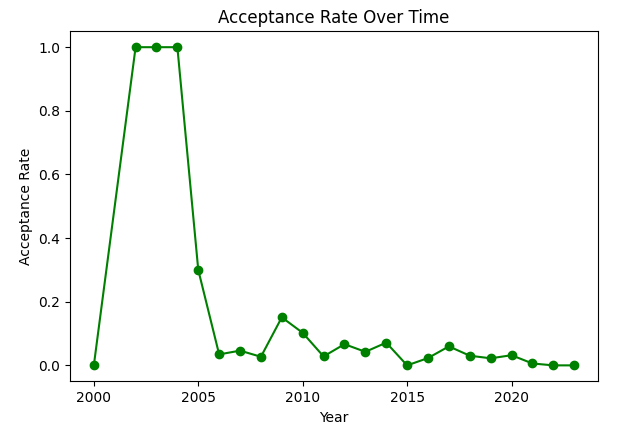

Next, we wanted to plot the days to decision between different generation type projects. The X-axis represents the generation type, and the y-axis is the amount of days until a decision was reached (accepted/withdrawn). Each point is colored to represent their status on the queue. As we can see, there is some correlation between the variables, as the longer a project is on the queue, the likelier they are to get accepted. However, staying on the queue for years affects the cost and development of the project, so not many projects are actually able to wait that long due to resource constraints

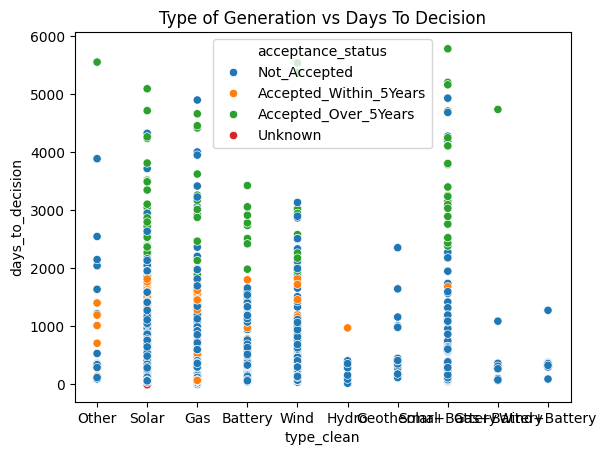

In [23]:
top_types = solar_df['type_clean'].value_counts().head(10).index.tolist()
df_top = solar_df[solar_df['type_clean'].isin(top_types)]
sns.scatterplot(
    data=df_top, 
    x='type_clean', 
    y='days_to_decision', 
    hue='acceptance_status'
)
plt.title("Type of Generation vs Days To Decision")
plt.show()

The following scatterplot plots "Days to Decision" against "Generation" of the project. "mw1" represents the estimated energy generated from the project's installation. The points are again colored by their queue acceptance status. We noted that those with less than 1000 MW in "mw1" are more likely to get accepted than those with higher generation capabilities. 

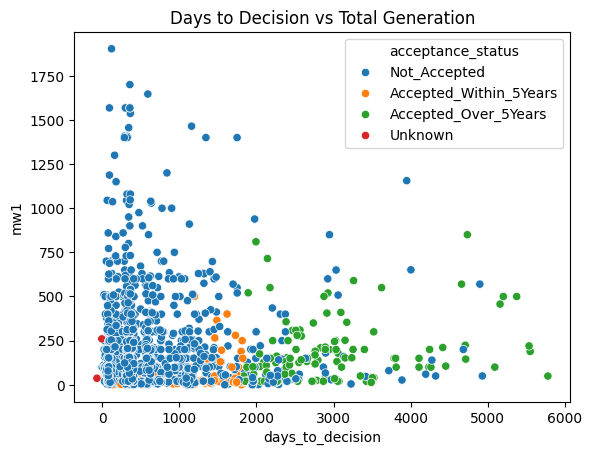

In [24]:
generation_req = solar_df[solar_df['project_type'] == "Generation"]
sns.scatterplot(
    data=generation_req, 
    x='days_to_decision', 
    y='mw1', 
    hue='acceptance_status'
)
plt.title("Days to Decision vs Total Generation")
plt.show()

### Prediction Question 2 Visualizations (Predicted POI Cost per kW)

The following four visualizations helped provide a general summary of how the dataset is organized.

1. This histogram illustrates how POI cost per kW is distributed across the dataset, revealing a heavily right-skewed pattern with most projects clustered at relatively low costs. The vertical dashed line marks the median, highlighting how extreme outliers pull the distribution far to the right. (even after restricting the bounds)

2. The box plot summarizes the central tendency and spread of POI cost per kW, clearly showing a compact interquartile range alongside a very large number of high-cost outliers. This emphasizes the asymmetry and extreme variability in the data.

3. After applying a log transformation, the distribution becomes far more symmetric, indicating that most of the skew in the original values comes from multiplicative rather than additive variation. This plot helps reveal underlying structure that was obscured by extreme outliers in the raw scale. There are two peaks in the distribution, implying there are possibly two clusters of distribution.

4. The Q-Q plot compares the ordered POI cost values to the theoretical quantiles of a normal distribution, showing large curvature and strong deviation from the diagonal line. This confirms that the raw POI cost data is highly non-normal due to heavy right-tail outliers.

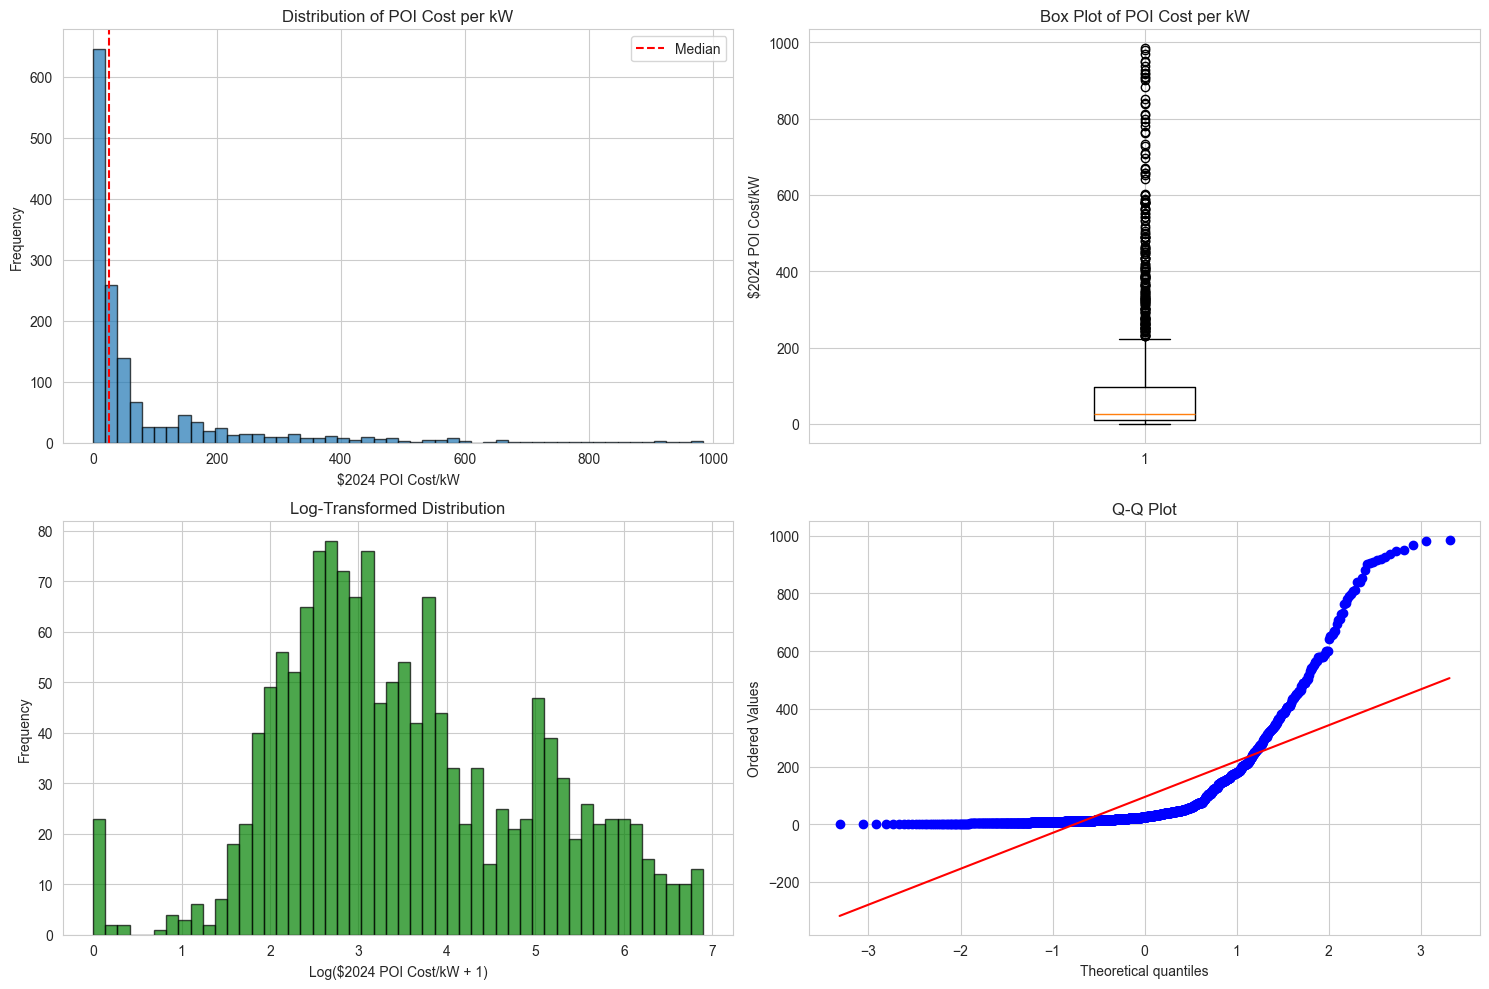

In [25]:
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

df = cost_cleaned.copy()

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Histogram
axes[0, 0].hist(df['$2024 POI Cost/kW'], bins=50, edgecolor='black', alpha=0.7)
axes[0, 0].set_xlabel('$2024 POI Cost/kW')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Distribution of POI Cost per kW')
axes[0, 0].axvline(df['$2024 POI Cost/kW'].median(), color='red', linestyle='--', label='Median')
axes[0, 0].legend()

# Box plot
axes[0, 1].boxplot(df['$2024 POI Cost/kW'].dropna(), vert=True)
axes[0, 1].set_ylabel('$2024 POI Cost/kW')
axes[0, 1].set_title('Box Plot of POI Cost per kW')

# Log-transformed distribution
log_poi_cost = np.log1p(df['$2024 POI Cost/kW'])
axes[1, 0].hist(log_poi_cost, bins=50, edgecolor='black', alpha=0.7, color='green')
axes[1, 0].set_xlabel('Log($2024 POI Cost/kW + 1)')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_title('Log-Transformed Distribution')

# Q-Q plot quantiles v. theoretical quantiles
stats.probplot(df['$2024 POI Cost/kW'].dropna(), dist="norm", plot=axes[1, 1])
axes[1, 1].set_title('Q-Q Plot')

plt.tight_layout()
plt.show()


Below is a statistic summary of the POI cost feature, along with the values of its skew and kurtosis. The positive skew value indicates a right skew, and the positive kurtosis value indicates its dispersion and how more values are centered around the median than a normal distribution curve.

In [26]:
print(f"POI Cost Statistics:")
print(df['$2024 POI Cost/kW'].describe())
print(f"\nSkewness: {df['$2024 POI Cost/kW'].skew():.2f}")
print(f"Kurtosis (Heavy or Light Distribution Tails): {df['$2024 POI Cost/kW'].kurtosis():.2f}")

POI Cost Statistics:
count    1507.000000
mean       94.302960
std       161.523785
min         0.000000
25%        11.560000
50%        25.010000
75%        96.910000
max       984.550000
Name: $2024 POI Cost/kW, dtype: float64

Skewness: 2.89
Kurtosis (Heavy or Light Distribution Tails): 9.21


This dataset, unlike pour previous question, includes multiple states. To see the density of where the locations are clustered in, we plotted the geographic distribution using latitude and longitude values as the x and y axes respectively. The density of points is seen in the saturation of the color, but the color shade itself depicts the POI cost for a given coordinate. (The bottom right is Florida, and you can see its shape reflect the state boundaries)

The graph on its right displays the average POI price per kW per state, and what states are included in the dataset. As we can see, California, Washington, and Oregon (West Coast) have the highest POI cost per kW prices compared to the other states.

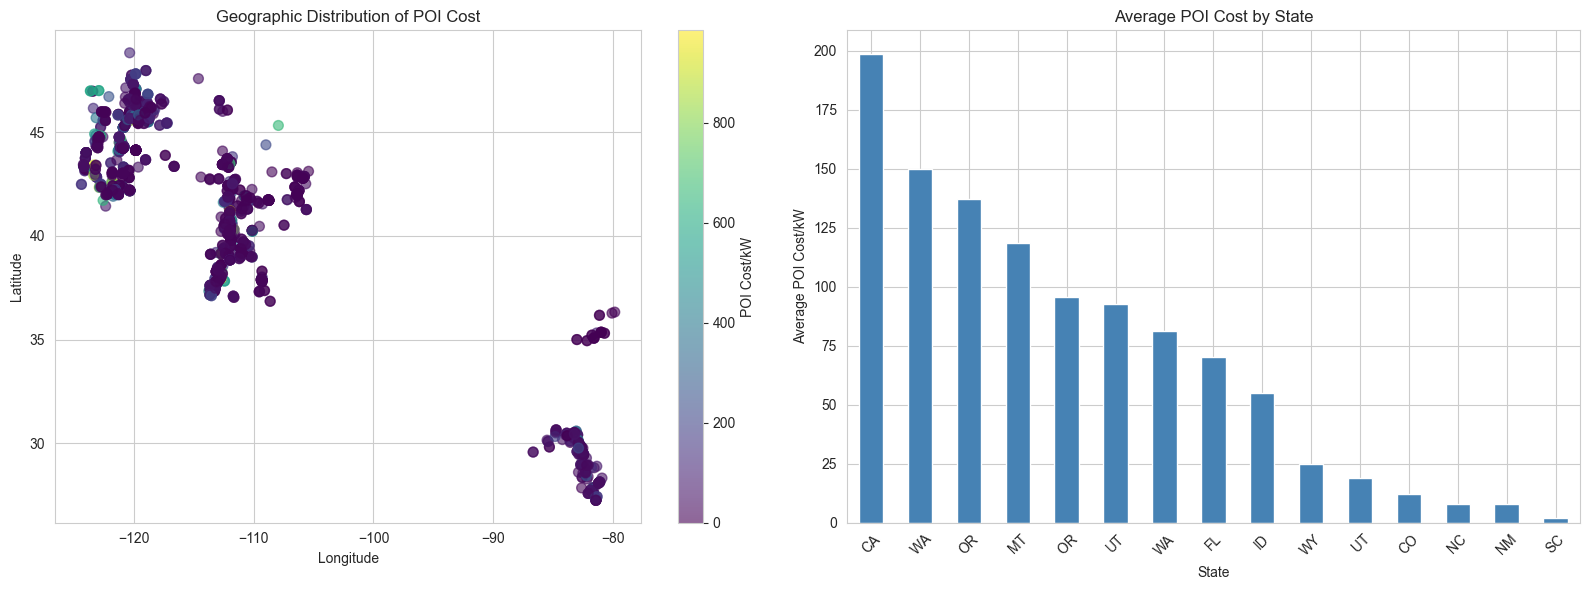

In [27]:
##Geographic Plots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Scatter plot with lat/lon
scatter = axes[0].scatter(df['Longitude of POI'], df['Latitude of POI'], 
                          c=df['$2024 POI Cost/kW'], cmap='viridis', 
                          alpha=0.6, s=50)
axes[0].set_xlabel('Longitude')
axes[0].set_ylabel('Latitude')
axes[0].set_title('Geographic Distribution of POI Cost')
plt.colorbar(scatter, ax=axes[0], label='POI Cost/kW')

# State-level average costs
state_costs = df.groupby('State')['$2024 POI Cost/kW'].agg(['mean', 'count']).sort_values('mean', ascending=False)
state_costs['mean'].plot(kind='bar', ax=axes[1], color='steelblue')
axes[1].set_xlabel('State')
axes[1].set_ylabel('Average POI Cost/kW')
axes[1].set_title('Average POI Cost by State')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


The following graphs are 3 side-by-side boxplot diagrams.

1. This boxplot compares POI cost per kW across different balancing authorities, showing how median costs vary modestly while the spread and prevalence of extreme outliers differ substantially. It highlights that some authorities, particularly PacifiCorp (PAC), exhibit far higher upper-end costs than others.

2. This boxplot shows how POI cost per kW varies by the status of the interconnection request, with “Operational” projects displaying a notably wider cost range and higher median than other categories. The large number of high-cost outliers across all statuses underscores the underlying skewed distribution of project costs which was also seen in the histogram plot created earlier.

3. This boxplot compares different service types, revealing broadly similar medians but distinct differences in variability and upper-tail costs among ERIS, NRIS, and Unknown categories. As with the other groupings, numerous high-cost outliers dominate the upper range, indicating highly uneven project-level expenses.

Throughout all three visualizations, there are many values existing beyond the IQR, which is to be expected given how skewed the POI Cost values are.

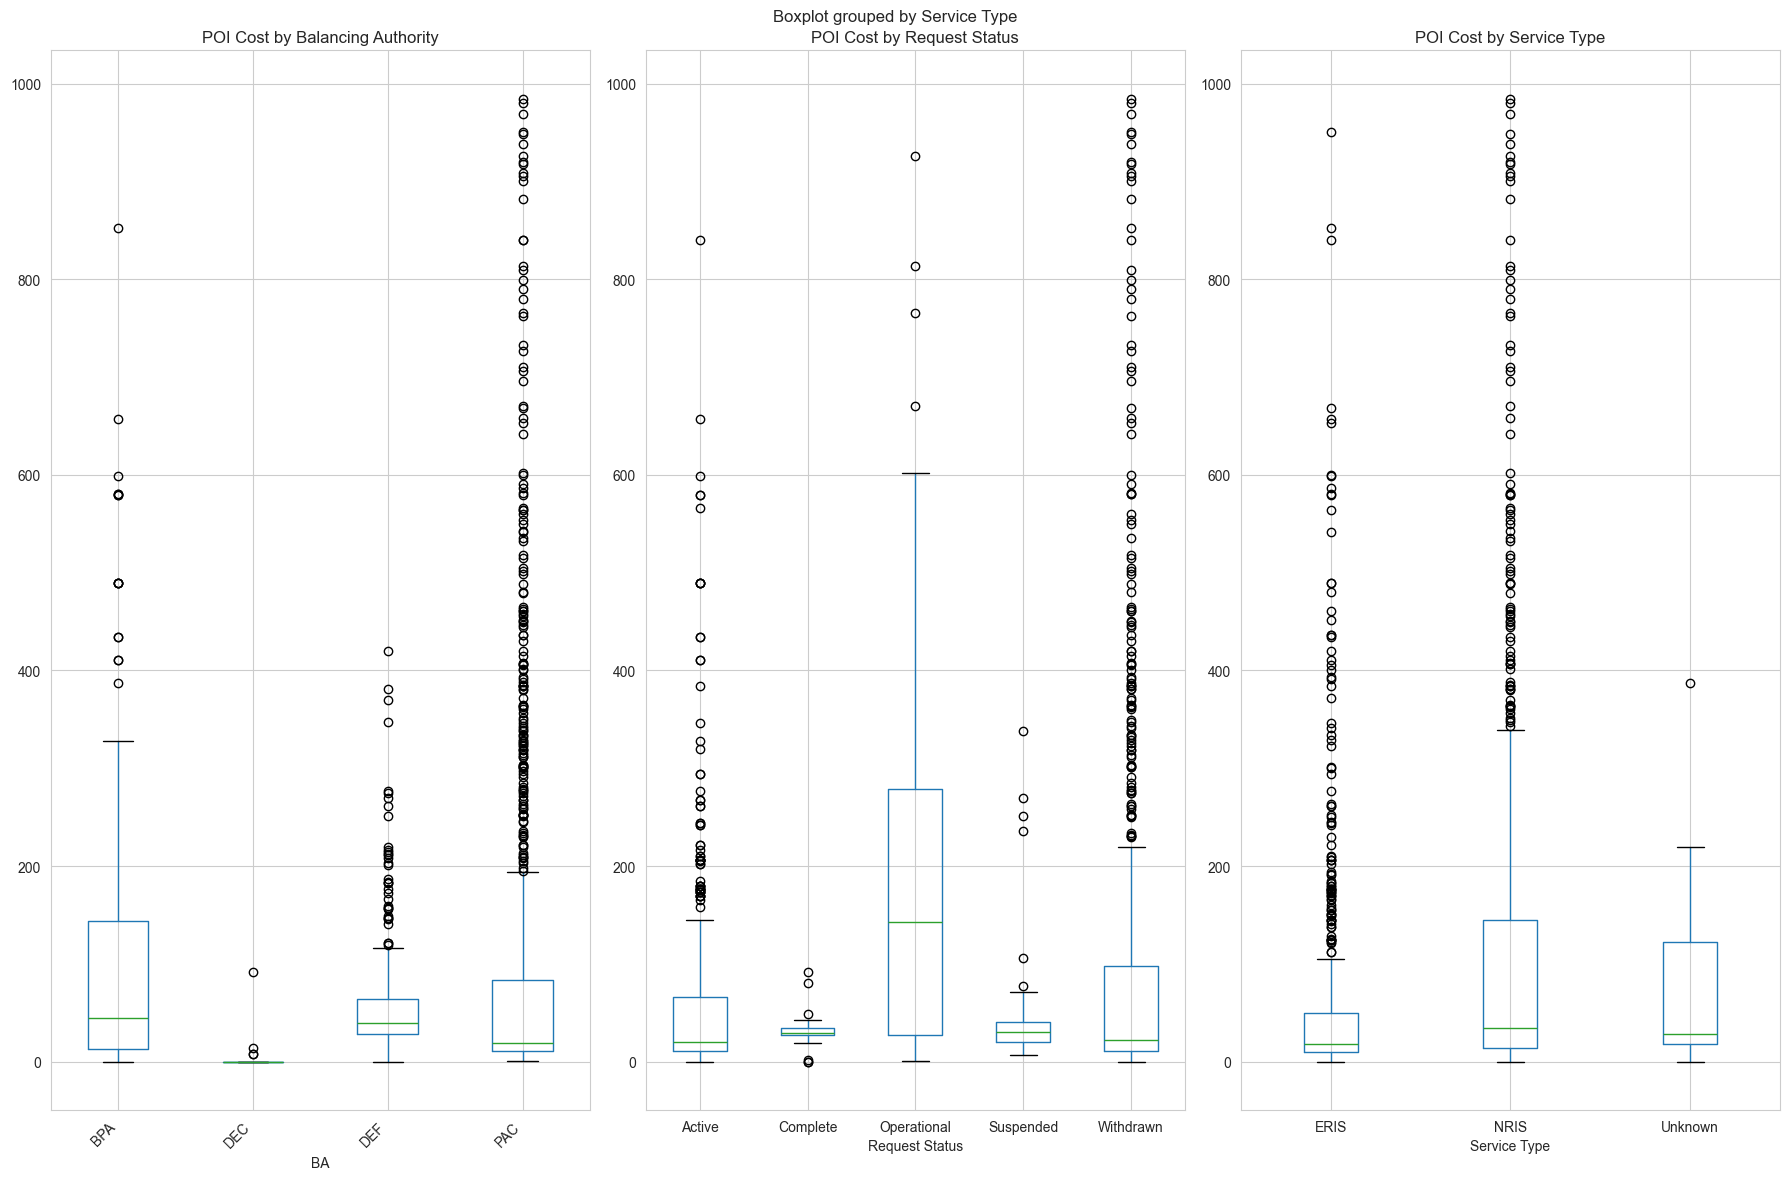

In [28]:
## Categorical Features
fig, axes = plt.subplots(1, 3, figsize=(18, 12))

# Balancing Authority
df.boxplot(column='$2024 POI Cost/kW', by='BA', ax=axes[0], rot=90)
axes[0].set_title('POI Cost by Balancing Authority')
axes[0].set_xlabel('BA')
plt.sca(axes[0])
plt.xticks(rotation=45, ha='right')

# Request Status
df.boxplot(column='$2024 POI Cost/kW', by='Request Status', ax=axes[1])
axes[1].set_title('POI Cost by Request Status')
axes[1].set_xlabel('Request Status')

# Service Type
df.boxplot(column='$2024 POI Cost/kW', by='Service Type', ax=axes[2])
axes[2].set_title('POI Cost by Service Type')
axes[2].set_xlabel('Service Type')


plt.tight_layout()
plt.show()


The next four scatterplots compare the POI cost per kW to the numerical features in the dataset. 

1. This scatterplot shows how POI cost per kW varies with project nameplate capacity, illustrating that smaller projects tend to exhibit much higher variability and more extreme per-kW costs than larger ones. As capacity increases, most points cluster near the bottom, suggesting bigger scale projects tend to be in areas of low POI cost per kW.

2. This visualization examines POI cost per kW across different transmission voltages, showing no clear linear relationship but distinct vertical bands corresponding to common voltage classes. Higher-voltage projects do not consistently exhibit higher or lower costs, reflecting the complexity and case-specific nature of each project.

3. This scatterplot compares POI cost per kW to network upgrade cost per kW, revealing that while most projects cluster at low values of both metrics, a subset experiences extremely large network upgrade costs. The wide vertical spread at low network costs shows that POI cost can be high even when network upgrades are modest, adding to the complexities in determining total interconnection expenses.

4. By plotting both variables on a log scale, this transformed chart reveals a clearer negative trend, with larger projects generally achieving lower per-kW POI costs. (as noted in graph 1) The transformation makes underlying structure more visible by compressing extreme values to highlight a more gradual, scale-dependent relationship.

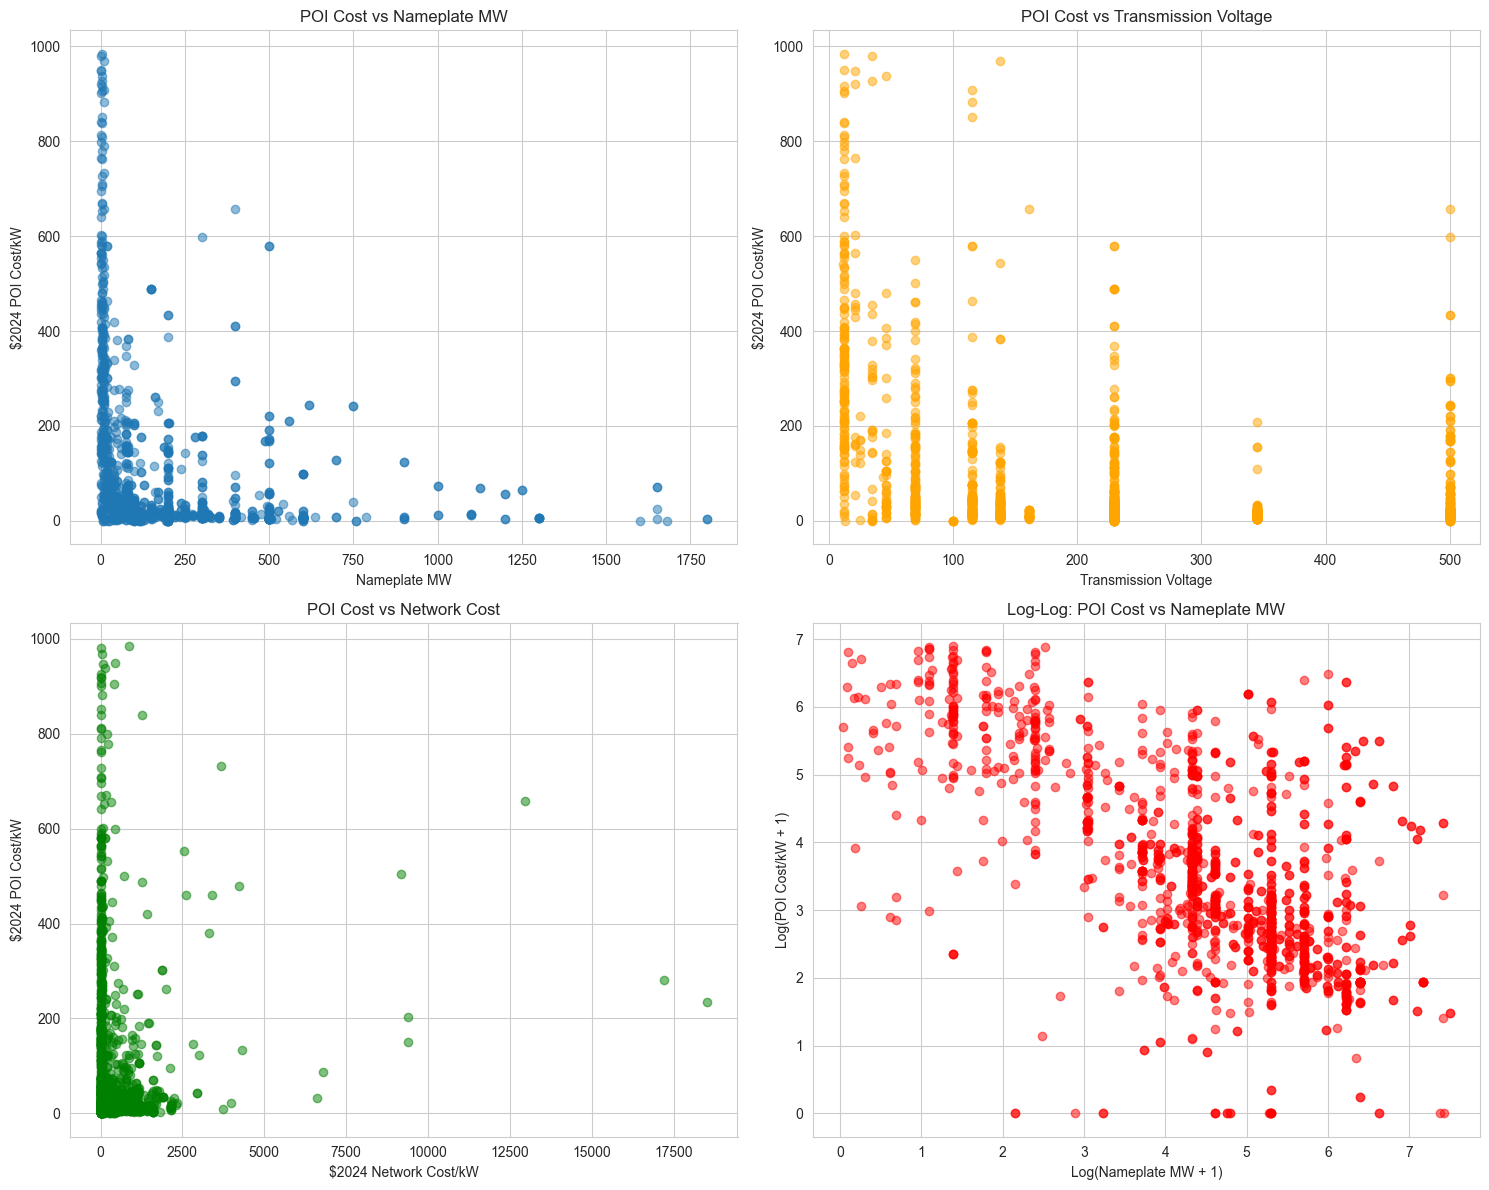

In [29]:
##Numerical Features
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# POI Cost vs Nameplate MW
axes[0, 0].scatter(df['Nameplate MW'], df['$2024 POI Cost/kW'], alpha=0.5)
axes[0, 0].set_xlabel('Nameplate MW')
axes[0, 0].set_ylabel('$2024 POI Cost/kW')
axes[0, 0].set_title('POI Cost vs Nameplate MW')

# POI Cost vs Transmission Voltage
axes[0, 1].scatter(df['Transmission Voltage'], df['$2024 POI Cost/kW'], alpha=0.5, color='orange')
axes[0, 1].set_xlabel('Transmission Voltage')
axes[0, 1].set_ylabel('$2024 POI Cost/kW')
axes[0, 1].set_title('POI Cost vs Transmission Voltage')

# POI Cost vs Network Cost
axes[1, 0].scatter(df['$2024 Network Cost/kW'], df['$2024 POI Cost/kW'], alpha=0.5, color='green')
axes[1, 0].set_xlabel('$2024 Network Cost/kW')
axes[1, 0].set_ylabel('$2024 POI Cost/kW')
axes[1, 0].set_title('POI Cost vs Network Cost')

# Log-log plot for Nameplate MW (often shows clearer relationship)
axes[1, 1].scatter(np.log1p(df['Nameplate MW']), np.log1p(df['$2024 POI Cost/kW']), alpha=0.5, color='red')
axes[1, 1].set_xlabel('Log(Nameplate MW + 1)')
axes[1, 1].set_ylabel('Log(POI Cost/kW + 1)')
axes[1, 1].set_title('Log-Log: POI Cost vs Nameplate MW')

plt.tight_layout()
plt.show()


The next two visualize the temporal aspect of the dataset:

1. This line graph charts the mean and median POI costs over the years. They follow similar trends, and show that through the majority of the recent years, the mean is higher than the median, again indicating the right skewness of the dataset.

2. This boxplot diagram shows the cost distribution of each year. In comparison to the previous years, the more recent years have far more outliers, meaning higher project costs. 

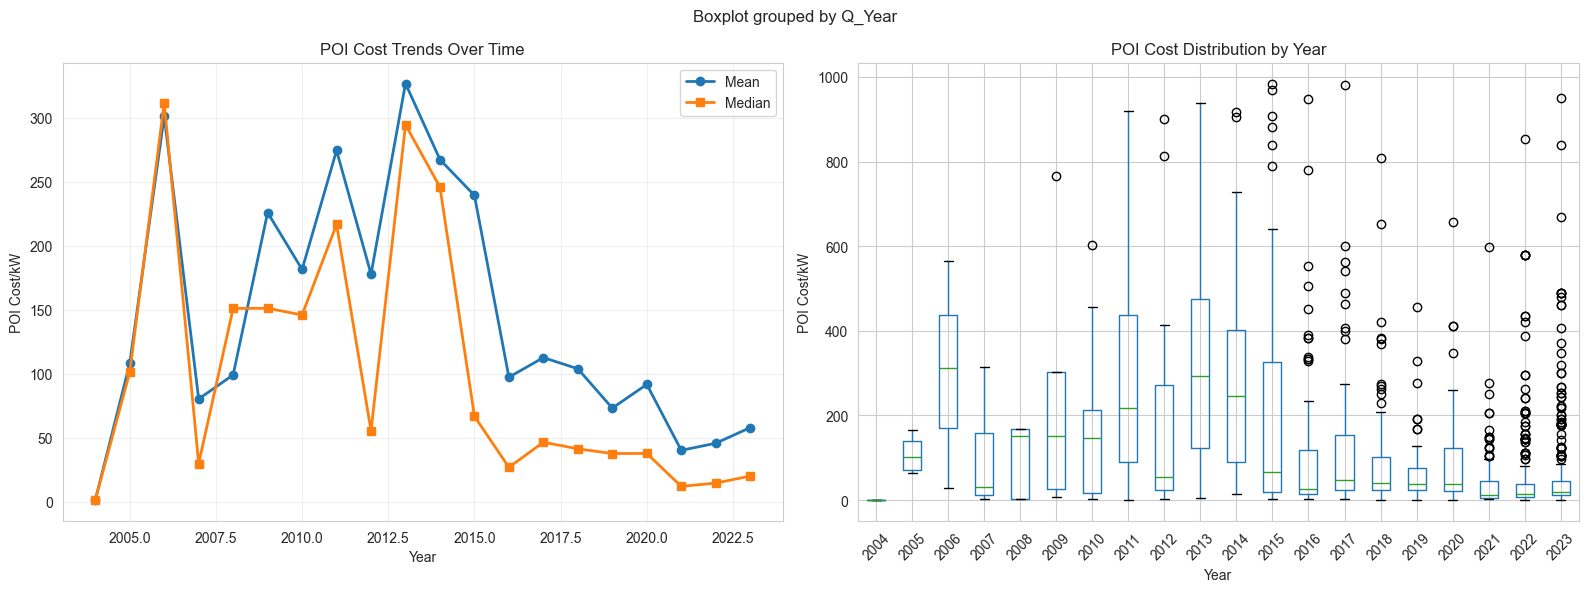

In [30]:
#Graphs Over Time
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Create study year if not exists
df['S_Year'] = df['Q_Year']  

# Time series by year
yearly_stats = df.groupby('Q_Year')['$2024 POI Cost/kW'].agg(['mean', 'median', 'count'])
axes[0].plot(yearly_stats.index, yearly_stats['mean'], marker='o', label='Mean', linewidth=2)
axes[0].plot(yearly_stats.index, yearly_stats['median'], marker='s', label='Median', linewidth=2)
axes[0].set_xlabel('Year')
axes[0].set_ylabel('POI Cost/kW')
axes[0].set_title('POI Cost Trends Over Time')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Box plot by year
df.boxplot(column='$2024 POI Cost/kW', by='Q_Year', ax=axes[1])
axes[1].set_xlabel('Year')
axes[1].set_ylabel('POI Cost/kW')
axes[1].set_title('POI Cost Distribution by Year')
plt.sca(axes[1])
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()



This next scatterplot plots the Nameplate MW (maximum continuous electrical output) on the x-axis against the POI cost on the y-axis, with the points differentiated by the top 5 Balancing Authorities (certified operators of the energy grid). Observations include that PAC covers the majority of small Nameplate MW projects, while BPA handles many of the larger generation projects.

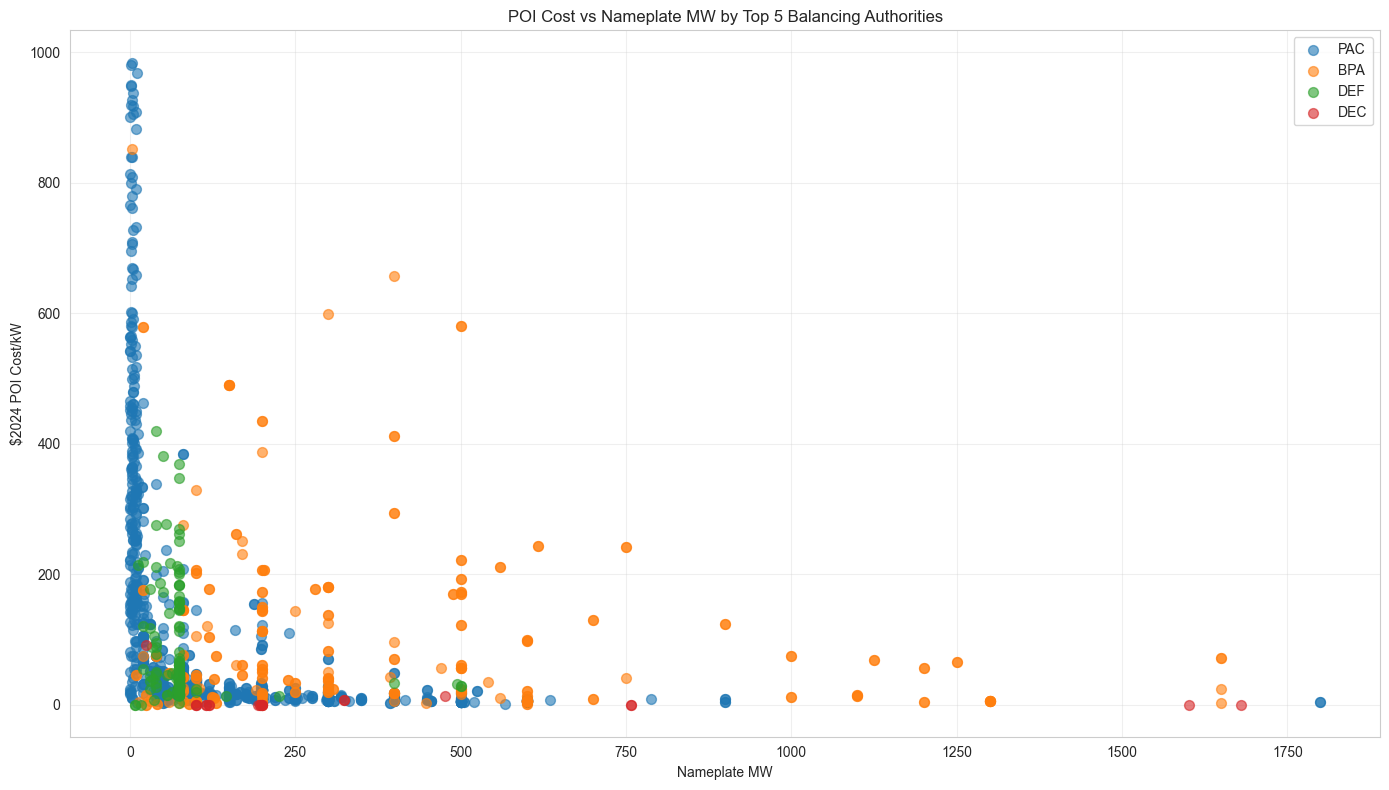

In [31]:
# POI Cost vs Nameplate MW, colored by BA (top BAs only)
top_bas = df['BA'].value_counts().head(5).index
df_top = df[df['BA'].isin(top_bas)]

plt.figure(figsize=(14, 8))
for ba in top_bas:
    subset = df_top[df_top['BA'] == ba]
    plt.scatter(subset['Nameplate MW'], subset['$2024 POI Cost/kW'], 
                label=ba, alpha=0.6, s=50)
plt.xlabel('Nameplate MW')
plt.ylabel('$2024 POI Cost/kW')
plt.title('POI Cost vs Nameplate MW by Top 5 Balancing Authorities')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


Finally, these last few graphs describe the categorical feature counts in the dataset.

1. Distribution of projects by Balancing Authority (4 operators)

2. Request Status Distribution

3. Service Type Distribution

4. Distribution of number of projects by State 

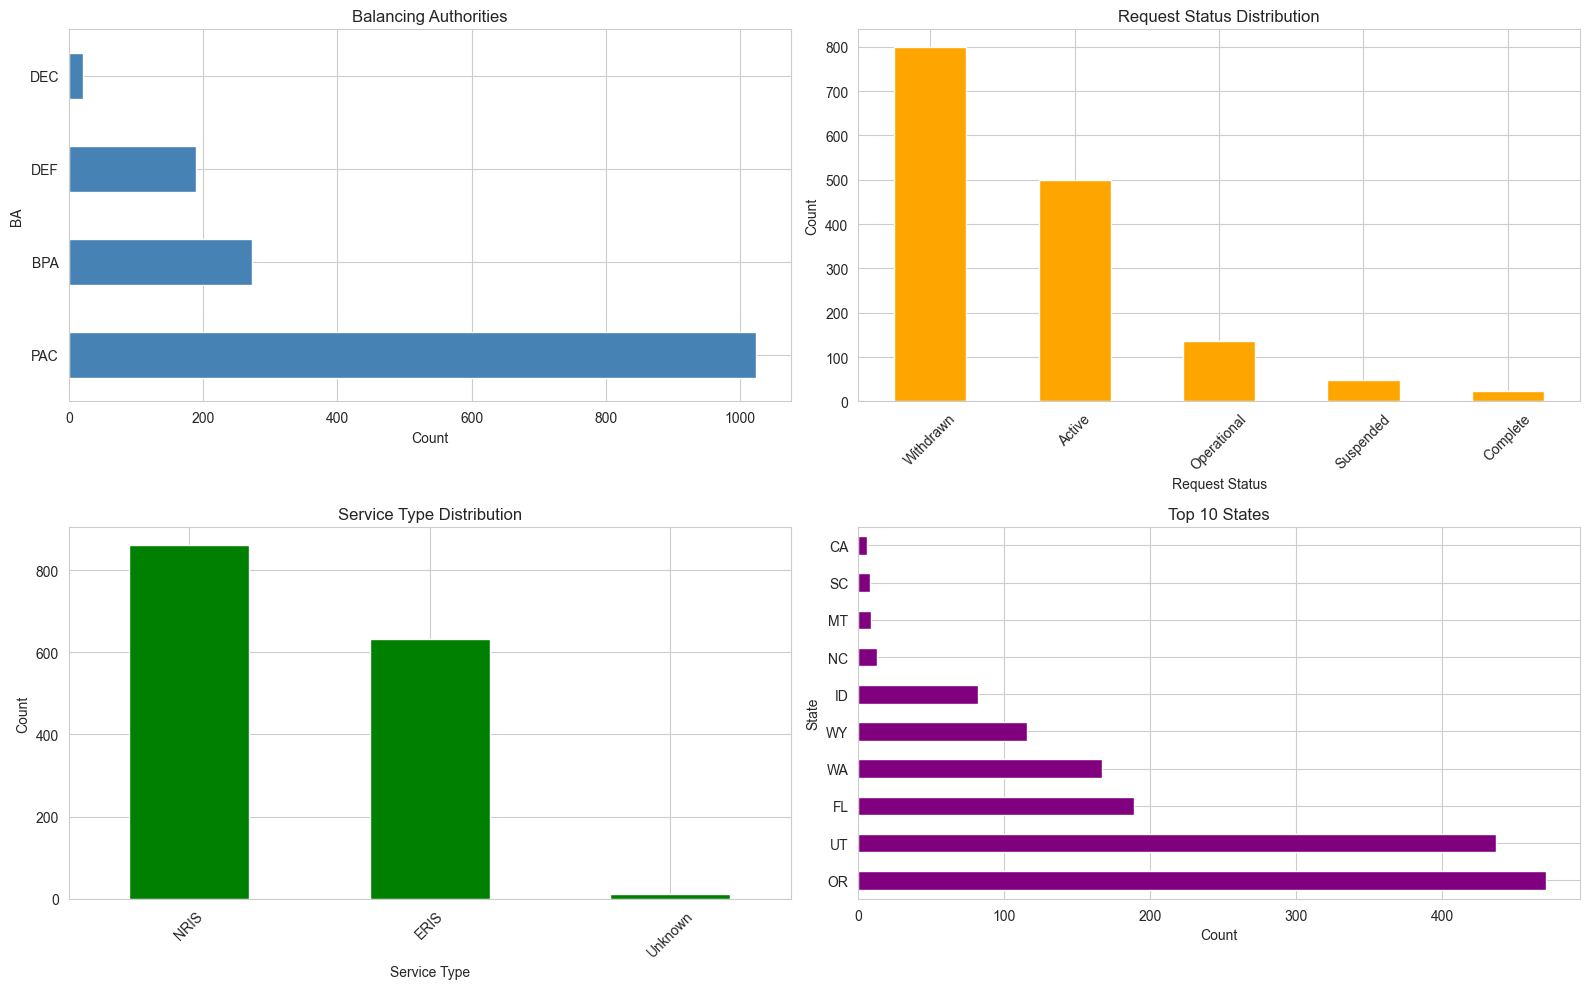

In [32]:
## Categorical Feature Counts
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# BA distribution
ba_counts = df['BA'].value_counts().head(10)
ba_counts.plot(kind='barh', ax=axes[0, 0], color='steelblue')
axes[0, 0].set_xlabel('Count')
axes[0, 0].set_title('Balancing Authorities')

# Request Status
df['Request Status'].value_counts().plot(kind='bar', ax=axes[0, 1], color='orange')
axes[0, 1].set_xlabel('Request Status')
axes[0, 1].set_ylabel('Count')
axes[0, 1].set_title('Request Status Distribution')
axes[0, 1].tick_params(axis='x', rotation=45)

# Service Type
df['Service Type'].value_counts().plot(kind='bar', ax=axes[1, 0], color='green')
axes[1, 0].set_xlabel('Service Type')
axes[1, 0].set_ylabel('Count')
axes[1, 0].set_title('Service Type Distribution')
axes[1, 0].tick_params(axis='x', rotation=45)

# State distribution
state_counts = df['State'].value_counts().head(10)
state_counts.plot(kind='barh', ax=axes[1, 1], color='purple')
axes[1, 1].set_xlabel('Count')
axes[1, 1].set_title('Top 10 States')

plt.tight_layout()
plt.show()


## Forecasting and Prediction Modeling (25 points)

This section is where the rubber meets the road.  In it you must:
1. Explore at least 3 prediction modeling approaches for each prediction question, ranging from the simple (e.g. linear regression, KNN) to the complex (e.g. SVM, random forests, Lasso).  
2. Motivate all your modeling decisions.  This includes parameter choices (e.g., how many folds in k-fold cross validation, what time window you use for averaging your data) as well as model form (e.g., If you use regression trees, why?  If you include nonlinear features in a regression model, why?). 
1. Carefully describe your cross validation and model selection process.  You should partition your data into training and testing data sets.  The training data set is what you use for cross-validation (i.e. you sample from within it to create folds, etc.).  The testing data set is held to the very end of your efforts, and used to compare qualitatively different models (e.g. OLS vs random forests).
4. Very carefully document your workflow.  We will be reading a lot of projects, so we need you to explain each basic step in your analysis.  
5. Seek opportunities to write functions allow you to avoid doing things over and over, and that make your code more succinct and readable. 

### Prediction Question 1 (Acceptance Status Estimator)

For the first question, we sought out 3 different predictive classifier models to assess our data, because our target variable is a classification of whether or not the project would be accepted within 5 years. Because classification models develop probabilities before classification, we used 0.7 as a cutoff because we want the model to be more restrictive of accepting projects, because there is a greater chance it is rejected or withdrawn. We used these models because they have the ability to accomodate for imbalanced class distribution as there are far more withdrawn projects than operational projects. 

Below are the categorical features and the numerical features we use in the 3 models. Other columns are redundant or irrelevant. We had to separate the categorical and numerical features in order to properly one-hot encode the categorical columns.

Next we split our dataset into test and training data, and decided that 20% of the data will be allocated for our training set because it is a common and ideal metric to ensure we do not overfit or underfit our models.

In [33]:
categorical_features = [
     "County", "region", "project_type",
    "type1", "type_clean"
]

numeric_features = [
    "mw1",
    "Biomass_MWh", "Geothermal_MWh", "Small Hydro_MWh",
    "Solar PV_MWh", "Solar Thermal_MWh", "Wind_MWh", "Total_MWh",
    "Biomass_gen", "Geothermal_gen", "Small Hydro_gen",
    "Solar Photovoltaic_gen", "Solar Thermal_gen", "Wind_gen",
    "Total_gen (MWh)",
    "total_solar_cap", "total_solar_gen", "load_utilization"
]

X = solar_df[categorical_features + numeric_features]
y = solar_df["accepted_within_5yr"]


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2
)

Next is the One Hot Encoding step for the models. The categorical features fill any null values with the most frequent value, while the numerical null values will be filled with the column's median. While most frequent may not be the best default metric, the other metric options will not work and inputting "Missing" fails to fit the model. To preprocess all the features for the model, we used the ColumnTransformer function along with pipelines for the corresponding feature types.

In [34]:
#One Hot Encoding Step
#for categorical: fill NaN with "Missing" then one-hot encode
cat_pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

# for numerical: fill NaN with column median
num_pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median"))
])

preprocess = ColumnTransformer(
    transformers=[
        ("cat", cat_pipeline, categorical_features),
        ("num", num_pipeline, numeric_features)
    ]
)

The next code block is us trying to find the correct hyperparameters through GridSearchCV. It will uses cross validation to create many different models with varying hyperparameters and return the values that give the best CV. The range of options for each hyperparameter depends on predetermined values we came up with that we believed were going to improve the models. There are not that many values per hyperparameter due to storage space and the amount of models that would need to be created and evaluated for. Additionally, after each model is done being tuned, the program will return its ROC-AUC value and the best parameters found.

This computational cost is also why there is a fourth model, SVM, commented out of the code. When running this cell, the runtime exceeded 15 minutes and we decided that given our limited resources, we would not include the SVM model. Additionally, we tested SVM without GridSearch, as well as waiting for it to complete its cross validation, and ultimately, neither had great evaluation metrics, so we decided to save on computational costs.

The following code streamlines the hyperparameter tuning process by using a for loop to iterate through the same process across multiple models. Additionally, due to the long runtime for its computation, we tried different numbers of folds, and 5 returned the best outputs. (This process was redundant and long so the process is not seen in this code)

In [35]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Define models and their hyperparameter grids
models = {
    "RandomForest": {
        "model": RandomForestClassifier(),
        "params": {
            "n_estimators": [100, 200, 300, 400, 500],
            "max_depth": [5, 10, None, 15, 3],
            "min_samples_split": [2, 5, 6, 9],
            "min_samples_leaf": [1, 2, 7, 4],
            "class_weight": ["balanced"]
        }
    },
    "LogisticRegression": {
        "model": LogisticRegression(max_iter=1000, class_weight="balanced", solver="liblinear"),
        "params": {
            "C": [0.01, 0.1, 1, 10, 0.5, 3],
            "penalty": ["l1", "l2"]
        }
    },
    "GradientBoosting": {
        "model": GradientBoostingClassifier(random_state=67),
        "params": {
            "n_estimators": [50, 100, 150, 200, 300],
            "learning_rate": [0.01, 0.05, 0.07, 0.08, 0.1],
            "max_depth": [3, 4, 5, 10, 7],
            "subsample": [0.8, 1.0, 0.5, 0.9]
        }
    },
    # "SVM" : {
    #     "model": SVC(class_weight="balanced", probability=True),
    #     "params": {
    #         "C": [0.1, 1, 10, 50, 100],
    #         "kernel": ["linear", "rbf", "poly", "sigmoid"],
    #         "gamma": ["scale", "auto"],  # Only used for 'rbf', 'poly', 'sigmoid'
    #         "degree": [2, 3, 4]          # Only used for 'poly'
    # }
    # }
}

#OHE-repeated above

cat_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])
num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median"))
])
preprocess = ColumnTransformer([
    ("cat", cat_pipeline, categorical_features),
    ("num", num_pipeline, numeric_features)
])

#models

best_models = {}

for name, m in models.items():
    print(f"Running GridSearchCV for {name}...")
    
    pipeline = Pipeline([
        ("preprocess", preprocess),
        ("model", m["model"])
    ])
    
    grid = GridSearchCV(
        pipeline, 
        param_grid={"model__" + k: v for k, v in m["params"].items()},
        cv=5,                   # 5-fold CV
        scoring="roc_auc",      # optimize ROC AUC
        n_jobs=-1
    )
    
    grid.fit(X_train, y_train)
    best_models[name] = grid
    print(f"Best ROC AUC for {name}: {grid.best_score_:.4f}")
    print(f"Best parameters: {grid.best_params_}\n")



Running GridSearchCV for RandomForest...
Best ROC AUC for RandomForest: 0.7981
Best parameters: {'model__class_weight': 'balanced', 'model__max_depth': None, 'model__min_samples_leaf': 1, 'model__min_samples_split': 6, 'model__n_estimators': 500}

Running GridSearchCV for LogisticRegression...
Best ROC AUC for LogisticRegression: 0.7814
Best parameters: {'model__C': 1, 'model__penalty': 'l1'}

Running GridSearchCV for GradientBoosting...
Best ROC AUC for GradientBoosting: 0.8245
Best parameters: {'model__learning_rate': 0.08, 'model__max_depth': 4, 'model__n_estimators': 150, 'model__subsample': 0.5}



After this fitting and tuning process, the next for loop returns the classification report for the best models created for each prediction approach (Random Forest Classifier, Logistic Regression, Gradient Boosting Classifier)

In [36]:
for name, model in best_models.items():
    y_prob = model.predict_proba(X_test)[:, 1]
    y_pred = (y_prob >= 0.7).astype(int)  # your cutoff
    print(f"{name}")
    print("ROC AUC:", roc_auc_score(y_test, y_prob))
    print(classification_report(y_test, y_pred))
    print("\n")

RandomForest
ROC AUC: 0.731938274491466
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       329
           1       0.12      0.08      0.10        13

    accuracy                           0.94       342
   macro avg       0.54      0.53      0.53       342
weighted avg       0.93      0.94      0.94       342



LogisticRegression
ROC AUC: 0.7675941080196399
              precision    recall  f1-score   support

           0       0.97      0.91      0.94       329
           1       0.14      0.38      0.21        13

    accuracy                           0.89       342
   macro avg       0.56      0.65      0.57       342
weighted avg       0.94      0.89      0.91       342



GradientBoosting
ROC AUC: 0.7442132335749357
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       329
           1       0.20      0.08      0.11        13

    accuracy                           0.95   

The following are the evaluations of each of the approaches we used, using their best parameters that we found by cross validation. Then we run it against the test set to evaluate its performance on unseen data.

#### Gradient Boosting Classifier

Along with the best hyperparameters, we were able to use the SMOTE function to oversample on the train split to reduce class imbalance and improve the accuracy. The model significantly improves with SMOTE rather than without.

In [37]:
#Model

model_gb = GradientBoostingClassifier(
    learning_rate=0.01,
    max_depth=10,
    n_estimators=50,
    subsample=0.8
)

smote = SMOTE(k_neighbors=2, random_state=42)

pipeline_gb = imbpipeline(steps=[
    ("preprocess", preprocess),
    ("oversample", smote),     # oversampling ONLY on train split
    ("model", model_gb
    )
])

#Fitting & Results

pipeline_gb.fit(X_train, y_train)


y_prob_gb = pipeline_gb.predict_proba(X_test)[:, 1]


cutoff = 0.7 #agreed metric across all approaches
y_pred_gb = (y_prob_gb >= cutoff).astype(int)

results = X_test.copy()
results["actual"] = y_test.values
results["prob_accept_5yr"] = y_prob_gb
results["predicted"] = y_pred_gb

#### Random Forest

Instantiating a Random Forest Classifier Model with the best hyperparameters we found using cross validation.

In [38]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators=400,
    max_depth=None,
    min_samples_split=6,
    min_samples_leaf=1,
    class_weight="balanced"
    )

pipeline_rf = imbpipeline(steps=[
    ("preprocess", preprocess),    
    ("model", rf_model)
])

# Train
pipeline_rf.fit(X_train, y_train)

# Predict probabilities
rf_prob = pipeline_rf.predict_proba(X_test)[:, 1]

# Apply 0.7 cutoff
rf_pred = (rf_prob >= 0.7).astype(int)


#### Logistic Regression

Instantiating a Logistic Regression Model with the best hyperparameters we found using cross validation.

In [39]:
from sklearn.linear_model import LogisticRegression


log_model = LogisticRegression(
    class_weight="balanced",   
    max_iter=1000,
    solver="liblinear",
    penalty='l1',
    C= 1      
)

pipeline_log = imbpipeline(steps=[
    ("preprocess", preprocess),
    ("model", log_model)
])

pipeline_log.fit(X_train, y_train)

log_prob = pipeline_log.predict_proba(X_test)[:, 1]

log_pred = (log_prob >= 0.7).astype(int)


#### Model Evaluation

Here, are the visualizations of each model's performance (ROC-AUC curve, precision-recall curve, classification report, and confusion matrix). While it could be streamlined into a function, I found it easier for me to just code each one individually. For Random Forest and Gradient Boosting, we also visualized the feature importances for the model to illustrate which features affected the model the most. However, logistic regression does not return feature importance so it does not have a visualization.

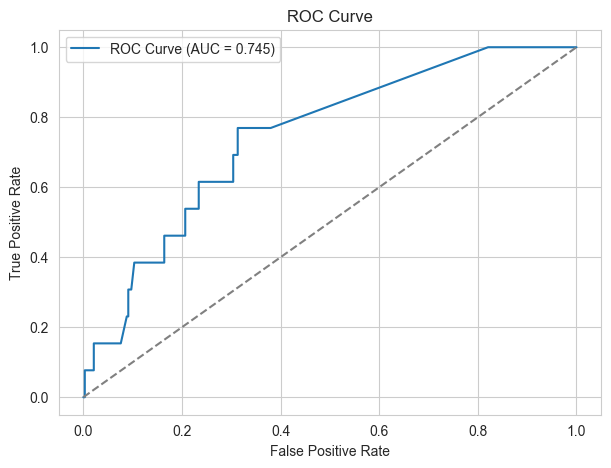

ROC AUC: 0.7445639466916063

Classification Report (cutoff = 0.7):
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       329
           1       0.00      0.00      0.00        13

    accuracy                           0.96       342
   macro avg       0.48      0.50      0.49       342
weighted avg       0.93      0.96      0.94       342



In [40]:
#Gradient Boosting ROC

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_prob_gb)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.3f})')
plt.plot([0,1], [0,1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

print("ROC AUC:", roc_auc_score(y_test, y_prob_gb))
print("\nClassification Report (cutoff = 0.7):")
print(classification_report(y_test, y_pred_gb))

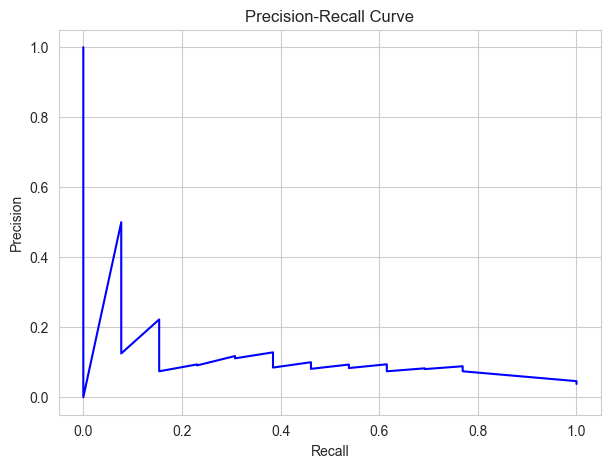

In [41]:
#Gradient Boosting Precision Recall
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_prob_gb)

plt.figure(figsize=(7,5))
plt.plot(recall, precision, color="blue")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.show()

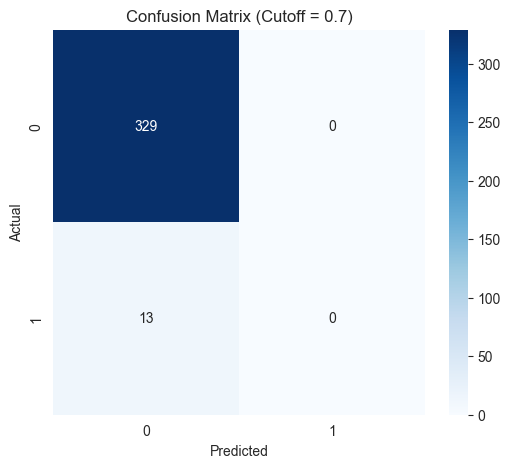

In [42]:
#Gradient Boosting Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred_gb)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix (Cutoff = 0.7)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


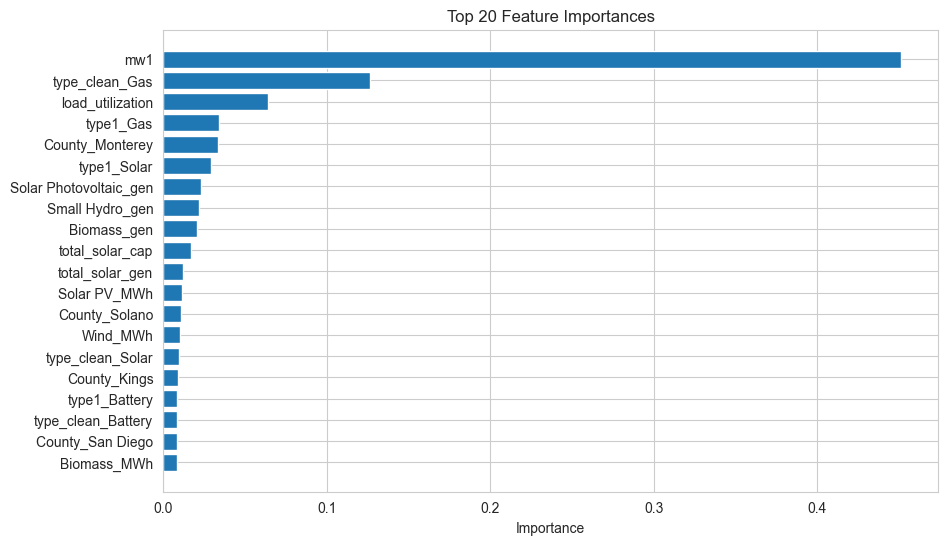

In [43]:
#Gradient Boosting Feature Importance
# Get feature names after one-hot encoding
cat_features = pipeline_gb.named_steps["preprocess"].named_transformers_["cat"]["encoder"].get_feature_names_out(categorical_features)
num_features = numeric_features
all_features = np.concatenate([cat_features, num_features])

# Get model importances
importances = pipeline_gb.named_steps["model"].feature_importances_

# Sort and plot
indices = np.argsort(importances)[::-1]
top_n = 20  # plot top 20
plt.figure(figsize=(10,6))
plt.barh(range(top_n), importances[indices][:top_n], align='center')
plt.yticks(range(top_n), all_features[indices][:top_n])
plt.xlabel("Importance")
plt.title("Top 20 Feature Importances")
plt.gca().invert_yaxis()
plt.show()


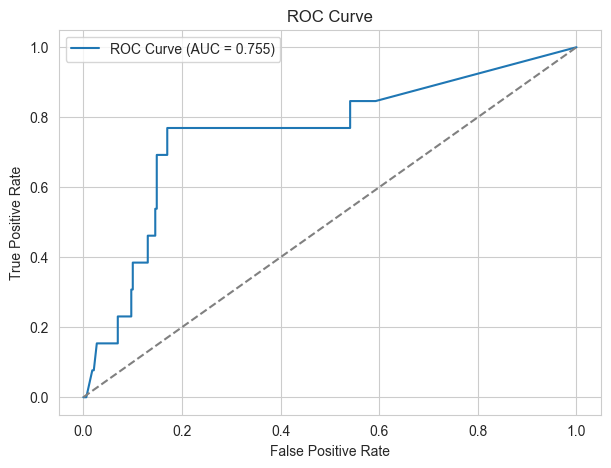

ROC AUC: 0.7552022445639468

Classification Report (cutoff = 0.7):
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       329
           1       0.12      0.08      0.10        13

    accuracy                           0.94       342
   macro avg       0.54      0.53      0.53       342
weighted avg       0.93      0.94      0.94       342



In [44]:
#Random Forest ROC

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, rf_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.3f})')
plt.plot([0,1], [0,1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

print("ROC AUC:", roc_auc_score(y_test, rf_prob))
print("\nClassification Report (cutoff = 0.7):")
print(classification_report(y_test, rf_pred))

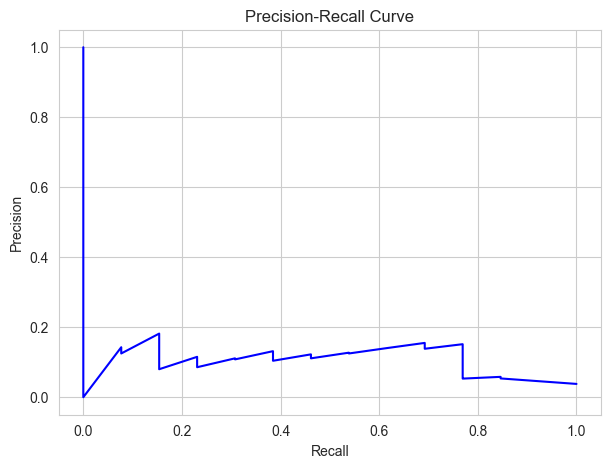

In [45]:
#Random Forest Precision Recall
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, rf_prob)

plt.figure(figsize=(7,5))
plt.plot(recall, precision, color="blue")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.show()

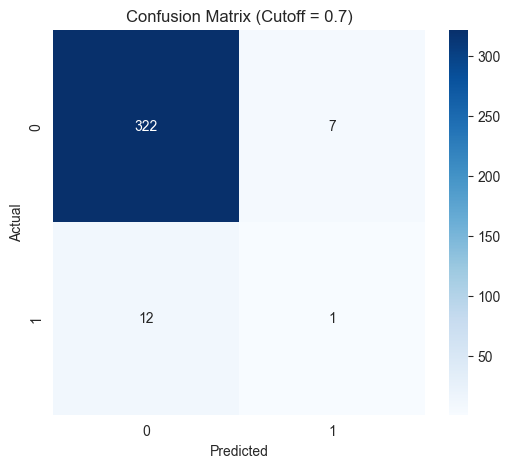

In [46]:
#Random Forest Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, rf_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix (Cutoff = 0.7)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


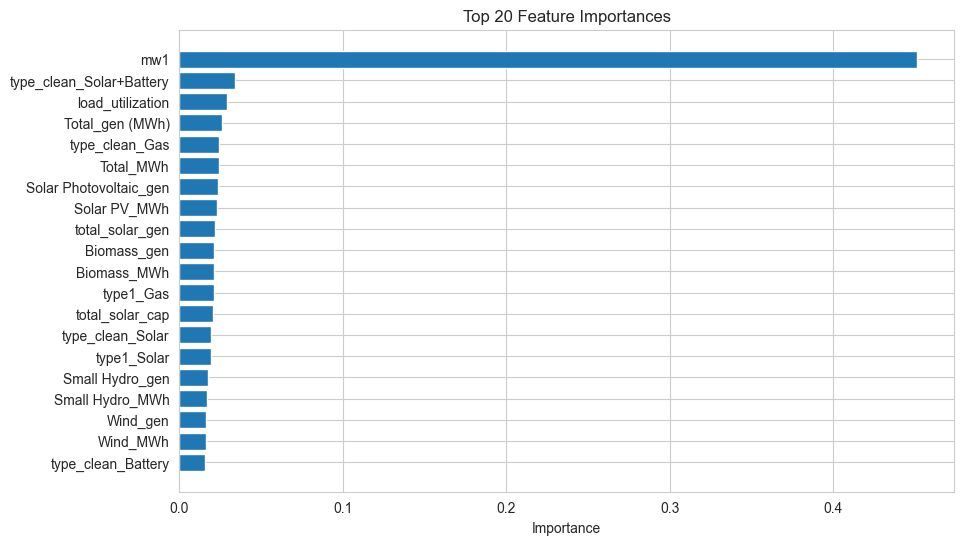

In [47]:
#Random Forest Feature Importance
# Get feature names after one-hot encoding
cat_features = pipeline_rf.named_steps["preprocess"].named_transformers_["cat"]["encoder"].get_feature_names_out(categorical_features)
num_features = numeric_features
all_features = np.concatenate([cat_features, num_features])

# Get model importances
importances = pipeline_rf.named_steps["model"].feature_importances_

# Sort and plot
indices = np.argsort(importances)[::-1]
top_n = 20  # plot top 20
plt.figure(figsize=(10,6))
plt.barh(range(top_n), importances[indices][:top_n], align='center')
plt.yticks(range(top_n), all_features[indices][:top_n])
plt.xlabel("Importance")
plt.title("Top 20 Feature Importances")
plt.gca().invert_yaxis()
plt.show()


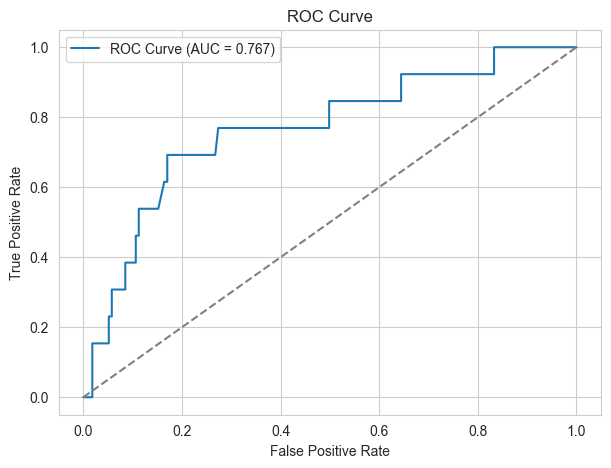

ROC AUC: 0.767360299275193

Classification Report (cutoff = 0.7):
              precision    recall  f1-score   support

           0       0.97      0.91      0.94       329
           1       0.14      0.38      0.21        13

    accuracy                           0.89       342
   macro avg       0.56      0.65      0.57       342
weighted avg       0.94      0.89      0.91       342



In [48]:
#Logistic Regression ROC

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, log_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.3f})')
plt.plot([0,1], [0,1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

print("ROC AUC:", roc_auc_score(y_test, log_prob))
print("\nClassification Report (cutoff = 0.7):")
print(classification_report(y_test, log_pred))

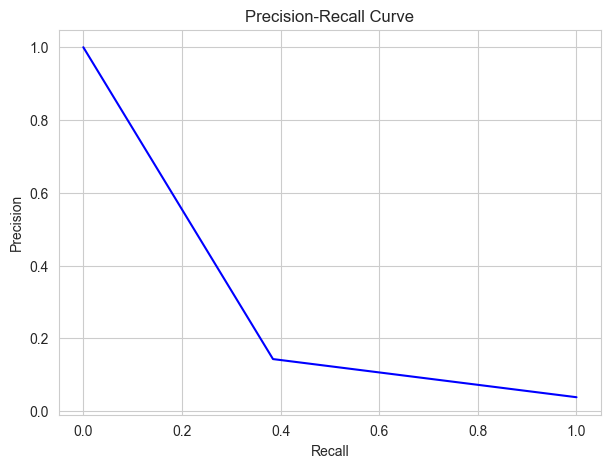

In [49]:
#Logistic Regression Precision Recall
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, log_pred)

plt.figure(figsize=(7,5))
plt.plot(recall, precision, color="blue")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.show()

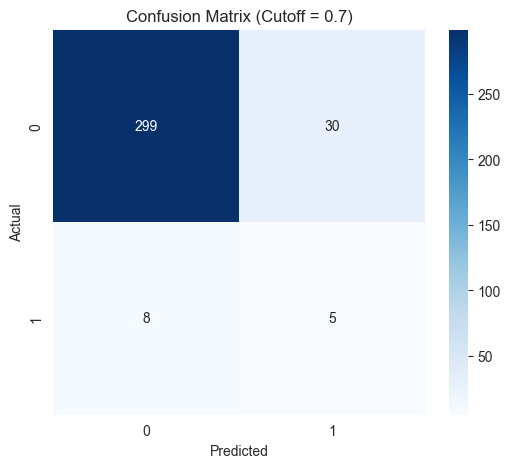

In [50]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, log_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix (Cutoff = 0.7)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### Model for Prediction Question 2 (POI Cost per kW Predictor)

In [51]:
#Feature Engineering
num_features = ['Latitude of POI', 'Longitude of POI', 'Study Year', 'Transmission Voltage', 'Nameplate MW', '$2024 Network Cost/kW', 'S_Month', 'S_Day', 'Q_Year', 'Q_Month', 'Q_Day']
cat_features = ['Balancing Authority', 'BA', 'State', 'County', 'Upgrade of Existing Generator',  'Substation Newly Built', 'Study Type', 'Restudy', 'Revision of Study', 'Fuel', 'Request Status', 'Service Type']

target = "$2024 POI Cost/kW"


X = cost_cleaned.drop(columns=[target])
y = cost_cleaned[target]

y_log = np.log1p(y) #for ridge models as EDA shows log-like curve in Q-Q

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
_, _, y_train_log, y_test_log = train_test_split(X, y_log, test_size=0.2, random_state=67)



Similar to the first prediction problem, I used a similar code structure to do the hyperparameter tuning and cross validation with Grid Search to arrive at the best results for hyperparameters. Again, I had to restrict the range of values to test due to computational costs and runtime issues. In this instance, there are no null values in the numeric type columns because I had already cleaned them, so the pipeline just passes through and does not impute anything. For the categorical features, it simply ignores any null values.

In [52]:
from sklearn.neighbors import KNeighborsRegressor


models = {
    "RandomForest": {
        "model": RandomForestRegressor(),
        "params": {
            "n_estimators": [50, 100, 200],
            "max_depth": [5, 10, 15, 3],
            "min_samples_split": [2, 5],
            "min_samples_leaf": [1, 2, 4],
        }
    },
    "KNeighborsRegression": {
        "model": KNeighborsRegressor(),
        "params": {
            "n_neighbors": [5, 10, 25, 50],
            "weights": ["uniform", "distance"],
            "metric" : ['minkowski'], #all possible metrics are versions of minkowski with different p values, so I kept just the minkowski metric
            "leaf_size": [10, 20, 30],
            "p"  : [1, 2]
        }
    },
   "RidgeRegression": {
        "model": Ridge(),
        "params": {
            "alpha": [0.01, 0.1, 1, 10, 20, 100, 200],
            "solver": ["auto", "lsqr"],  # remove 'svd'
        }
},
    "GradientBoosting": {
        "model": GradientBoostingRegressor(),
        "params": {
            "n_estimators": [100, 300],
            "learning_rate": [0.05, 0.1]
        }
    }
}

#OHE

cat_pipeline = Pipeline([
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])
preprocess = ColumnTransformer([
    ("cat", cat_pipeline, cat_features),
    ("num", "passthrough", num_features)
])

#models

best_models = {}

for name, m in models.items():
    print(f"Running GridSearchCV for {name}...")
    
    pipeline = Pipeline([
        ("preprocess", preprocess),
        ("model", m["model"])
    ])
    
    grid = GridSearchCV(
        pipeline,
        param_grid={"model__" + k: v for k, v in m["params"].items()},
        cv=5,
        scoring="neg_mean_absolute_error",   # for the regression metric
        n_jobs=-1
    )
    
    grid.fit(X_train, y_train)
    best_models[name] = grid

    y_pred = grid.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    print(f"Best RMSE for {name}: {rmse:.4f}")
    print(f"Best R² for {name}: {r2:.4f}")
    print(f"Best parameters: {grid.best_params_}\n")


Running GridSearchCV for RandomForest...


KeyboardInterrupt: 

#### Random Forest

Instantiating the Random Forest Regressor with the best hyperparameters and returning evaluation results

In [ ]:
## Random Forest
cat_pipeline = Pipeline([
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])
preprocess = ColumnTransformer([
    ("cat", cat_pipeline, cat_features),
    ("num", "passthrough", num_features)
])


rf_model = Pipeline([
    ("preprocess", preprocess),
    ("ridge", RandomForestRegressor(
    n_estimators=100,
    max_depth=15,
    min_samples_split=2,
    min_samples_leaf=1
))
])

rf_model.fit(X_train, y_train)

rf_train_pred = rf_model.predict(X_train)
rf_test_pred = rf_model.predict(X_test)

rf_train_rmse = np.sqrt(mean_squared_error(y_train, rf_train_pred))
rf_test_rmse = np.sqrt(mean_squared_error(y_test, rf_test_pred))
rf_train_mae = mean_absolute_error(y_train, rf_train_pred)
rf_test_mae = mean_absolute_error(y_test, rf_test_pred)
rf_train_r2 = r2_score(y_train, rf_train_pred)
rf_test_r2 = r2_score(y_test, rf_test_pred)

print(f"\nRandom Forest Results:")
print(f"Train RMSE: ${rf_train_rmse:.2f}/kW | Test RMSE: ${rf_test_rmse:.2f}/kW")
print(f"Train MAE:  ${rf_train_mae:.2f}/kW | Test MAE:  ${rf_test_mae:.2f}/kW")
print(f"Train R²:   {rf_train_r2:.4f}     | Test R²:   {rf_test_r2:.4f}")



Random Forest Results:
Train RMSE: $37.54/kW | Test RMSE: $89.54/kW
Train MAE:  $17.72/kW | Test MAE:  $38.10/kW
Train R²:   0.9464     | Test R²:   0.6806


#### Ridge Regression (With Log Transformation)

Instantiating the Ridge Regressor (with Log Transformation) with the best hyperparameters and returning evaluation results

In [ ]:
##Ridge Regression with Log Transformation
cat_pipeline = Pipeline([
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])
preprocess = ColumnTransformer([
    ("cat", cat_pipeline, cat_features),
    ("num", "passthrough", num_features)
])

ridge_model = Pipeline([
    ("preprocess", preprocess),
    ("ridge", Ridge(alpha=20, solver='auto'))
])


ridge_model.fit(X_train, y_train)

ridge_train_pred = ridge_model.predict(X_train)
ridge_test_pred = ridge_model.predict(X_test)

ridge_train_rmse = np.sqrt(mean_squared_error(y_train, ridge_train_pred))
ridge_test_rmse = np.sqrt(mean_squared_error(y_test, ridge_test_pred))
ridge_train_mae = mean_absolute_error(y_train, ridge_train_pred)
ridge_test_mae = mean_absolute_error(y_test, ridge_test_pred)
ridge_train_r2 = r2_score(y_train, ridge_train_pred)
ridge_test_r2 = r2_score(y_test, ridge_test_pred)

print(f"\nRidge Regression Results:")
print(f"Train RMSE: ${ridge_train_rmse:.2f}/kW | Test RMSE: ${ridge_test_rmse:.2f}/kW")
print(f"Train MAE:  ${ridge_train_mae:.2f}/kW | Test MAE:  ${ridge_test_mae:.2f}/kW")
print(f"Train R²:   {ridge_train_r2:.4f}     | Test R²:   {ridge_test_r2:.4f}")


Ridge Regression Results:
Train RMSE: $129.12/kW | Test RMSE: $121.57/kW
Train MAE:  $80.02/kW | Test MAE:  $76.01/kW
Train R²:   0.3663     | Test R²:   0.4113


#### KNN Regressor

Instantiating the KNN Regressor with the best hyperparameters and returning evaluation results

In [ ]:
## KNN Regressor
from sklearn.neighbors import KNeighborsRegressor

cat_pipeline = Pipeline([
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

preprocess = ColumnTransformer([
    ("cat", cat_pipeline, cat_features),
    ("num", "passthrough", num_features)
])


knn_model = Pipeline([
    ("preprocess", preprocess),
    ("knn", KNeighborsRegressor(
        n_neighbors=10,         
        weights="distance",    
        metric="minkowski",
        leaf_size = 10,   
        p=1
    ))
])

knn_model.fit(X_train, y_train)

knn_train_pred = knn_model.predict(X_train)
knn_test_pred = knn_model.predict(X_test)

knn_train_rmse = np.sqrt(mean_squared_error(y_train, knn_train_pred))
knn_test_rmse = np.sqrt(mean_squared_error(y_test, knn_test_pred))
knn_train_mae = mean_absolute_error(y_train, knn_train_pred)
knn_test_mae = mean_absolute_error(y_test, knn_test_pred)
knn_train_r2 = r2_score(y_train, knn_train_pred)
knn_test_r2 = r2_score(y_test, knn_test_pred)

print(f"\nKNN Regression Results:")
print(f"Train RMSE: ${knn_train_rmse:.2f}/kW | Test RMSE: ${knn_test_rmse:.2f}/kW")
print(f"Train MAE:  ${knn_train_mae:.2f}/kW | Test MAE:  ${knn_test_mae:.2f}/kW")
print(f"Train R²:   {knn_train_r2:.4f}     | Test R²:   {knn_test_r2:.4f}")



KNN Regression Results:
Train RMSE: $3.82/kW | Test RMSE: $112.98/kW
Train MAE:  $0.30/kW | Test MAE:  $51.20/kW
Train R²:   0.9994     | Test R²:   0.4914


#### Gradient Boosting Regressor

Instantiating the Gradient Boosting Regressor with the best hyperparameters and returning evaluation results

In [ ]:
##Gradient Boosting
cat_pipeline = Pipeline([
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])
preprocess = ColumnTransformer([
    ("cat", cat_pipeline, cat_features),
    ("num", "passthrough", num_features)
])


gb_model = Pipeline([
    ("preprocess", preprocess),
    ("ridge", GradientBoostingRegressor(
    n_estimators=300,
    max_depth=9, #previous hyperparameters I tuned for but had to remove for computation costs
    learning_rate=0.1,
    subsample=0.9 #previous hyperparameters I tuned for but had to remove for computation costs
))
])

gb_model.fit(X_train, y_train)

gb_train_pred = gb_model.predict(X_train)
gb_test_pred = gb_model.predict(X_test)

gb_train_rmse = np.sqrt(mean_squared_error(y_train, gb_train_pred))
gb_test_rmse = np.sqrt(mean_squared_error(y_test, gb_test_pred))
gb_train_mae = mean_absolute_error(y_train, gb_train_pred)
gb_test_mae = mean_absolute_error(y_test, gb_test_pred)
gb_train_r2 = r2_score(y_train, gb_train_pred)
gb_test_r2 = r2_score(y_test, gb_test_pred)

print(f"\nGradient Boost Results:")
print(f"Train RMSE: ${gb_train_rmse:.2f}/kW | Test RMSE: ${gb_test_rmse:.2f}/kW")
print(f"Train MAE:  ${gb_train_mae:.2f}/kW | Test MAE:  ${gb_test_mae:.2f}/kW")
print(f"Train R²:   {gb_train_r2:.4f}     | Test R²:   {gb_test_r2:.4f}")



Gradient Boost Results:
Train RMSE: $3.86/kW | Test RMSE: $91.25/kW
Train MAE:  $0.57/kW | Test MAE:  $34.36/kW
Train R²:   0.9994     | Test R²:   0.6683


#### Model Evaluation

Below is a comparison report of the four different models. It is sorted by Test RMSE and shows the training RMSE training R^2, the test RMSE, test MAE, test R^2. It also shows the difference in R^2 values between the training and testing values to see if there was any overfitting happening. Ultimately, it returns at the end the best model out of the four and its test RMSE and R^2 values.

In [ ]:
##Comparison

comparison_df = pd.DataFrame({
    'Model': ['Random Forest', 'Gradient Boost', 'KNeighbors Regression', 'Ridge Regression'],
    'Test RMSE': [rf_test_rmse, gb_test_rmse, knn_test_rmse, ridge_test_rmse],
    'Test MAE': [rf_test_mae, gb_test_mae, knn_test_mae, ridge_test_mae],
    'Test R²': [rf_test_r2, gb_test_r2, knn_test_r2, ridge_test_r2],
    'Train RMSE': [rf_train_rmse, gb_train_rmse, knn_train_rmse, ridge_train_rmse],
    'Train R²': [rf_train_r2, gb_train_r2, knn_train_r2, ridge_train_r2]
})

comparison_df['Overfit Gap (R²)'] = comparison_df['Train R²'] - comparison_df['Test R²']
comparison_df = comparison_df.sort_values('Test RMSE')

print("\nModel Performance Comparison (sorted by Test RMSE):")
print(comparison_df.to_string(index=False))

best_model_name = comparison_df.iloc[0]['Model']
print(f"\n  Best Model: {best_model_name}")
print(f"   Test RMSE: ${comparison_df.iloc[0]['Test RMSE']:.2f}/kW")
print(f"   Test R²: {comparison_df.iloc[0]['Test R²']:.4f}")




Model Performance Comparison (sorted by Test RMSE):
                Model  Test RMSE  Test MAE  Test R²  Train RMSE  Train R²  Overfit Gap (R²)
        Random Forest  89.541402 38.095353 0.680583   37.544735  0.946420          0.265837
       Gradient Boost  91.246607 34.358478 0.668302    3.863096  0.999433          0.331131
KNeighbors Regression 112.983138 51.202451 0.491446    3.822991  0.999444          0.507998
     Ridge Regression 121.565554 76.013556 0.411250  129.118937  0.366297         -0.044953

  Best Model: Random Forest
   Test RMSE: $89.54/kW
   Test R²: 0.6806


#### Comparative Visualizations

In [ ]:
#used code from online to help make function
def get_pipeline_feature_importances(pipeline):
    model = pipeline.named_steps['ridge']
    
    preprocessor = pipeline.named_steps[
        [name for name, step in pipeline.named_steps.items() if isinstance(step, ColumnTransformer)][0]
    ]
    
    processed_feature_names = []
    for name, transformer, cols in preprocessor.transformers_:
        if name == 'remainder' and transformer == 'passthrough':
            processed_feature_names.extend(cols)
        elif hasattr(transformer, 'get_feature_names_out'):
            processed_feature_names.extend(transformer.get_feature_names_out(cols))
        else:
            processed_feature_names.extend(cols)
    
    if len(processed_feature_names) != len(model.feature_importances_):
        raise ValueError("Number of processed features does not match feature_importances_.")
    
    importance_df = pd.DataFrame({
        "feature": processed_feature_names,
        "importance": model.feature_importances_
    }).sort_values("importance", ascending=False)
    
    return importance_df[:15]

For some reason, when inputting the code directly from the notebook I was working on, this function is not working properly. Despite working on my other notebook with identical code, we are unable to gather the feature importances from the Gradient Boosting and Random Forest models.

Below the code I have the correct outputs taken from the notebook I was originally working on. The first part is a Series where each row is a feature and its value is its importance to the model. The second part is the bar chart depiction of the Series.

In [ ]:
# IGNORE THIS CELL IT IS NOT WORKING FOR SOME UNKNOWN REASON
# gb_feature_importance = get_pipeline_feature_importances(gb_model)
# rf_feature_importance = get_pipeline_feature_importances(rf_model)
# print(gb_feature_importance)
# print(rf_feature_importance)

# ##Feature Importance Comparison
# fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# # Random Forest
# rf_feature_importance.head(15).plot(
#     x='feature', y='importance', kind='barh',
#     ax=axes[0], color='steelblue', legend=False
# )
# axes[0].set_xlabel('Importance')
# axes[0].set_title('Random Forest - Top 15 Features')
# axes[0].invert_yaxis()  # So the most important is on top

# # Gradient Boosting
# gb_feature_importance.head(15).plot(
#     x='feature', y='importance', kind='barh',
#     ax=axes[1], color='orange', legend=False
# )
# axes[1].set_xlabel('Importance')
# axes[1].set_title('Gradient Boosting - Top 15 Features')
# axes[1].invert_yaxis()


# plt.tight_layout()
# plt.show()


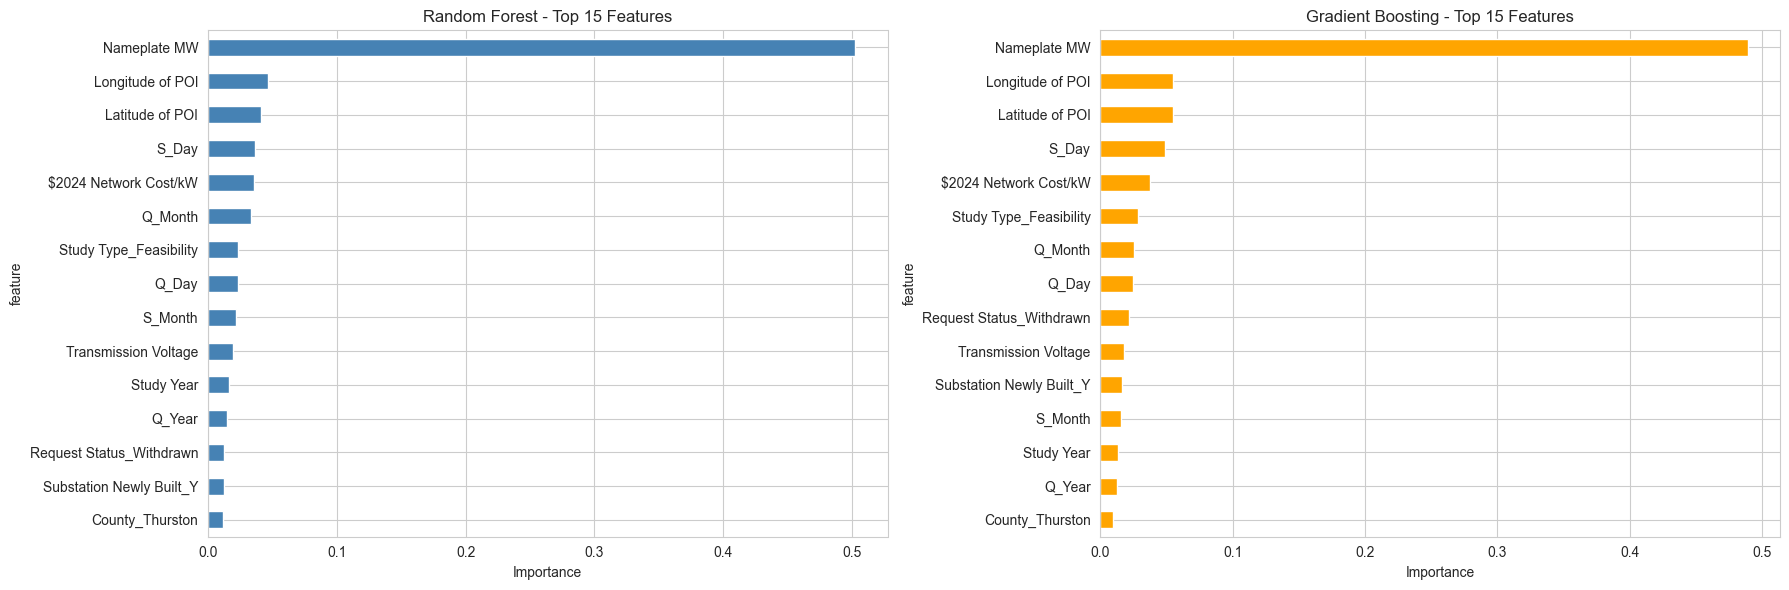

Comparative Model Bar Chart by Evaluation Metric

Model Comparison Bar Chart


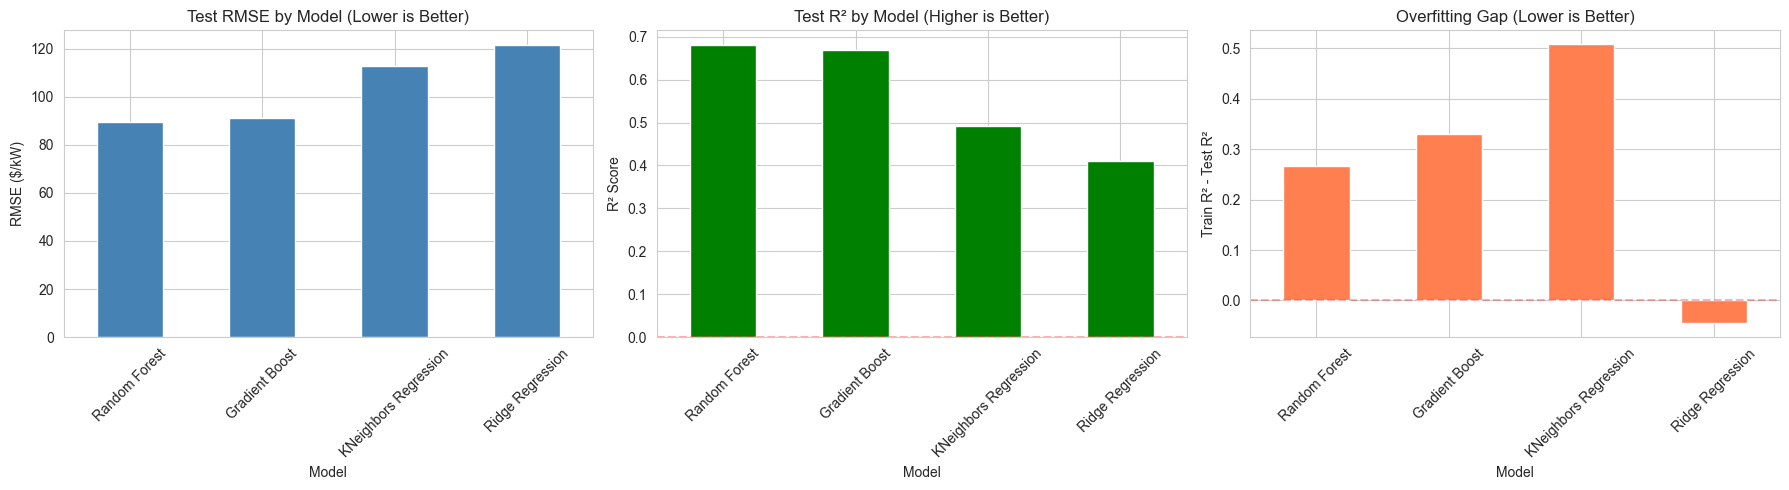

In [ ]:
##Model Comparison Bar Chart
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

comparison_df.plot(x='Model', y='Test RMSE', kind='bar', ax=axes[0], color='steelblue', legend=False)
axes[0].set_ylabel('RMSE ($/kW)')
axes[0].set_title('Test RMSE by Model (Lower is Better)')
axes[0].tick_params(axis='x', rotation=45)

comparison_df.plot(x='Model', y='Test R²', kind='bar', ax=axes[1], color='green', legend=False)
axes[1].set_ylabel('R² Score')
axes[1].set_title('Test R² by Model (Higher is Better)')
axes[1].tick_params(axis='x', rotation=45)
axes[1].axhline(y=0, color='red', linestyle='--', alpha=0.3)

comparison_df.plot(x='Model', y='Overfit Gap (R²)', kind='bar', ax=axes[2], color='coral', legend=False)
axes[2].set_ylabel('Train R² - Test R²')
axes[2].set_title('Overfitting Gap (Lower is Better)')
axes[2].tick_params(axis='x', rotation=45)
axes[2].axhline(y=0, color='red', linestyle='--', alpha=0.3)

print("Model Comparison Bar Chart")
plt.tight_layout()
plt.show()


Scatterplots of each Model's R^2

Actual v. Predicted Results


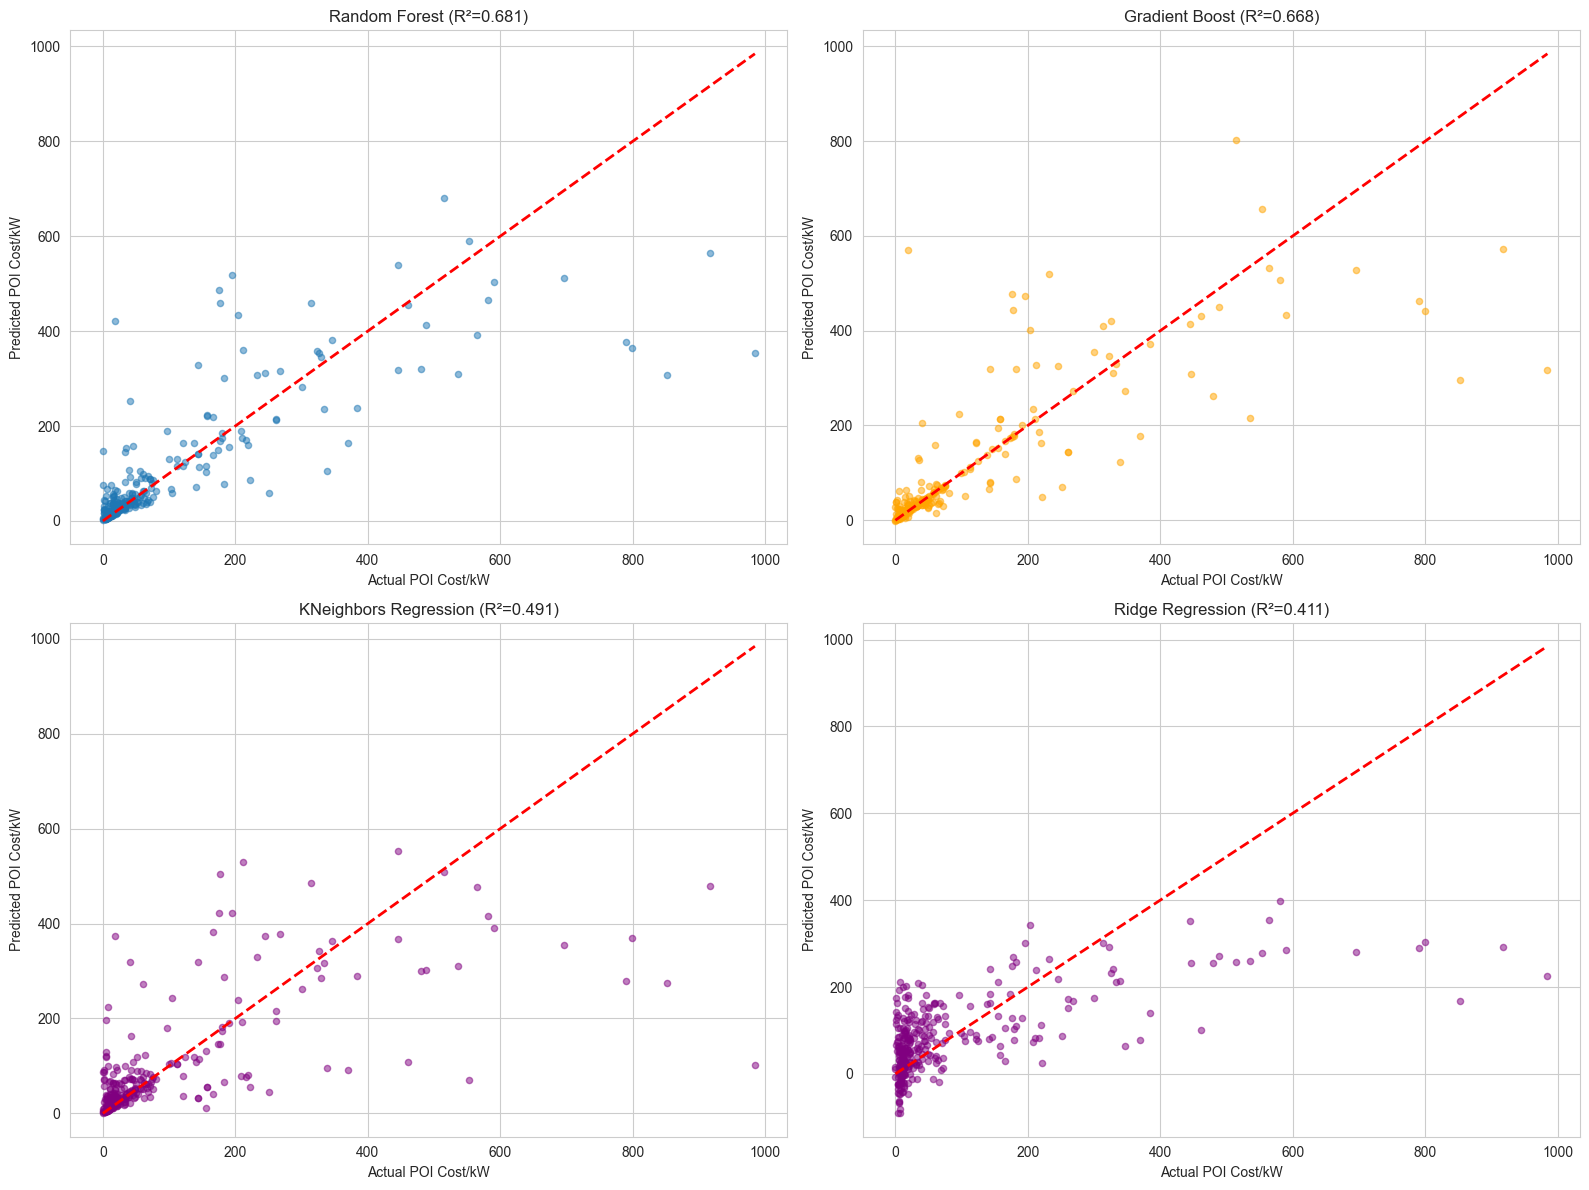

In [ ]:
##Actual vs Predicted (Best Model)
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Random Forest
axes[0, 0].scatter(y_test, rf_test_pred, alpha=0.5, s=20)
axes[0, 0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[0, 0].set_xlabel('Actual POI Cost/kW')
axes[0, 0].set_ylabel('Predicted POI Cost/kW')
axes[0, 0].set_title(f'Random Forest (R²={rf_test_r2:.3f})')

# Gradient Boost
axes[0, 1].scatter(y_test, gb_test_pred, alpha=0.5, s=20, color='orange')
axes[0, 1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[0, 1].set_xlabel('Actual POI Cost/kW')
axes[0, 1].set_ylabel('Predicted POI Cost/kW')
axes[0, 1].set_title(f'Gradient Boost (R²={gb_test_r2:.3f})')

# Ridge
axes[1, 1].scatter(y_test, ridge_test_pred, alpha=0.5, s=20, color='purple')
axes[1, 1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[1, 1].set_xlabel('Actual POI Cost/kW')
axes[1, 1].set_ylabel('Predicted POI Cost/kW')
axes[1, 1].set_title(f'Ridge Regression (R²={ridge_test_r2:.3f})')

#KNeighbors
axes[1, 0].set_title(f'KNeighbors Regression (R²={knn_test_r2:.3f})')
axes[1, 0].scatter(y_test, knn_test_pred, alpha=0.5, s=20, color='purple')
axes[1, 0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[1, 0].set_xlabel('Actual POI Cost/kW')
axes[1, 0].set_ylabel('Predicted POI Cost/kW')
axes[1, 0].set_title(f'KNeighbors Regression (R²={knn_test_r2:.3f})')

print("Actual v. Predicted Results")
plt.tight_layout()
plt.show()


Comparative Residual Analysis

Residual Analysis


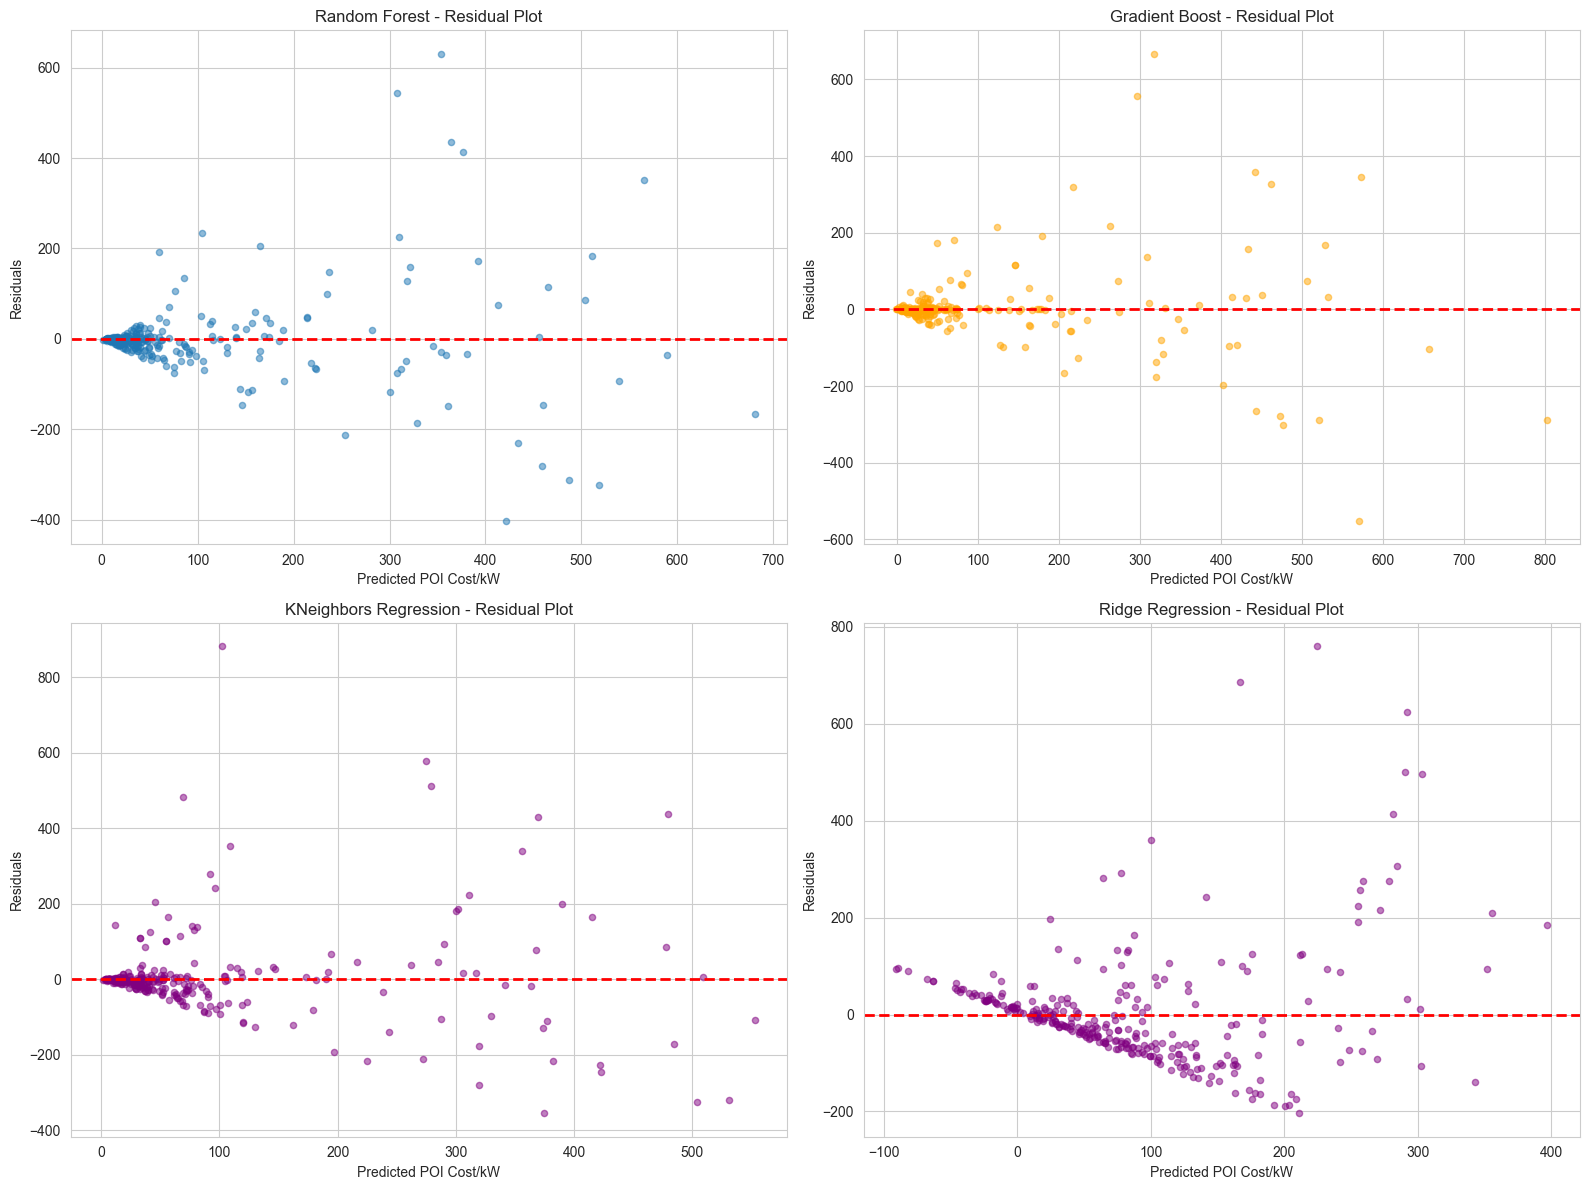

In [ ]:

## Residual Analysis
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Random Forest 
rf_residuals = y_test - rf_test_pred
axes[0, 0].scatter(rf_test_pred, rf_residuals, alpha=0.5, s=20)
axes[0, 0].axhline(y=0, color='red', linestyle='--', lw=2)
axes[0, 0].set_xlabel('Predicted POI Cost/kW')
axes[0, 0].set_ylabel('Residuals')
axes[0, 0].set_title('Random Forest - Residual Plot')

# Gradient Boost 
gb_residuals = y_test - gb_test_pred
axes[0, 1].scatter(gb_test_pred, gb_residuals, alpha=0.5, s=20, color='orange')
axes[0, 1].axhline(y=0, color='red', linestyle='--', lw=2)
axes[0, 1].set_xlabel('Predicted POI Cost/kW')
axes[0, 1].set_ylabel('Residuals')
axes[0, 1].set_title('Gradient Boost - Residual Plot')


# KNeighbors Regression 
knn_residuals = y_test - knn_test_pred
axes[1, 0].scatter(knn_test_pred, knn_residuals, alpha=0.5, s=20, color='purple')
axes[1, 0].axhline(y=0, color='red', linestyle='--', lw=2)
axes[1, 0].set_xlabel('Predicted POI Cost/kW')
axes[1, 0].set_ylabel('Residuals')
axes[1, 0].set_title('KNeighbors Regression - Residual Plot')

#Ridge
ridge_residuals = y_test - ridge_test_pred
axes[1, 1].scatter(ridge_test_pred, ridge_residuals, alpha=0.5, s=20, color='purple')
axes[1, 1].axhline(y=0, color='red', linestyle='--', lw=2)
axes[1, 1].set_xlabel('Predicted POI Cost/kW')
axes[1, 1].set_ylabel('Residuals')
axes[1, 1].set_title('Ridge Regression - Residual Plot')
print("Residual Analysis")
plt.tight_layout()
plt.show()


## Resource Allocation and Conclusions (20 points)
Our resource allocation question is how can resources be allocated to projects in the interconnection queue that are likely to be accepted within 5 years and are prepared to pay their POI cost per kilowatt? The answer to this is important to ensure that limited resources aren't being used towards projects that will withdraw later on in the process, but instead towards projects that have a high likelihood of becoming operational. First, looking at the visualizations for acceptance within 5 years, it seems that projects involving solar have the highest number of acceptance at 32 projects, with gas following behind at 21 projects, and wind at 9 projects. Next, focusing on all projects that were accepted within 5 years, they have an average capacity of 64.15 MW and a mode of 20 MW. Overall, independent of wait time, it seems that Imperial County has the highest acceptance rate at 0.095238 followed by Alameda County at 0.078947 and San Diego at 0.077419. Based on these data, those seeking to connect to the grid can have some clues as to what projects are more likely to be accepted and become operational within 5 years. In terms of POI cost per kilowatt, accepted projects have an average cost of $94.302960/KW, although this value is largely dependent on features such as nameplate capacity in MW, longitude of POI, and latitude of POI. However, based on average POI Cost by state, it appears that California has the highest POI costs, followed by Washington and Oregon. The answers to our prediction problems provide both those managing the grid and those who are seeking to connect to the grid some guidance on which projects are more likely to become operational rather than end up withdrawing, and thus which projects to invest more resources in. We would advise these two decision makers to espeically consider generation type (solar), capacity in MW (around 64.15), and county (Imperial County) when allocating resources. This in turn may lead to an influx in projects that meet these criteria, and greater acceptance rates from the interconnection queue for some time. It may also lead certain projects to choose not to join the queue due to their lower likelihood of acceptance within 5 years, which will lead to a more efficient queue, as well as saved time and resources. The POI cost per kilowatt is also an important factor to consider as large costs may deter some projects, leading to withdrawal. While this cost varies, it may be helpful for those seeking to connect to the grid to know which states generally have lower POI costs. Additionally, our model is able to predict POI cost per kilowatt with a test RMSE of 93.606 and a test R-squared of 0.697. The reader should care about these results because it will allow those managing the grid to maximize their limited resources to projects that will be able to increase grid capacity. This is especially important as energy demands rises, pressuring existing grids. Additionally, those seeking to connect to the grid will be able to become more informed about how they can best apply to enter the interconnection queue so that they will have a high chance of becoming operational within 5 years with relatively low POI cost per kilowatt. One caveat to our results is our model only accounts for a snapshot in time. It does not account for changes that might occur as a result of resource allocation. For example, while we may currently advise to consider certain categories within features as indicators of which projects are best to allocate resources to such as solar (generation type), around 64.15 MW (capacity), Imperial County (county), and South Carolina (state), this will not be the case long term. Once projects with these characteristics exceed the need, there will be a decline in acceptance rates. Another reason our results might be flawed is our data has heavy class imbalance, despite efforts to remedy this issue. Due to this, our model may have skewed results that favor certain categories within features simply because they are more abundant rather than because they actually contribute the most to projects that have been accepted from the interconnection queue and became operational.